Preamble

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.cm import get_cmap
from scipy.optimize import linear_sum_assignment
from gensim.models import Word2Vec

1a)

In [ ]:
#Load data
df = pd.read_csv('PADL-Q11-train.csv')
X = df.drop(columns='out')
y = df['out']

#Split 20% off for test and debugging
X_train, X_unseen, y_train, y_unseen = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#Build pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

#parameters for grid search
param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha':  [0.001, 0.01, 0.1, 1]
}
#perform grid search with r2 scoring
grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='r2'
)

#train
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

#evaluate on test set
y_pred_unseen = best_model.predict(X_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)

print(f"\nR² on simulated hold-out (20% of train): {r2_unseen:.4f}")
print(f"Cross-validated best R²: {grid.best_score_:.4f}")


R² on simulated hold-out (20% of train): 1.0000
Cross-validated best R²: 1.0000


In [ ]:
#Code to run test set on
test_q1a = pd.read_csv('PADL-Q11-unseen.csv')
X_unseen_q1a = test_q1a.drop(columns='out')
y_unseen_q1a = test_q1a['out']

y_pred_q1a = best_model.predict(X_unseen_q1a)
r2_q1a_unseen = r2_score(y_unseen_q1a, y_pred_q1a)

print("R² on test data:", r2_q1a_unseen)

1b)

In [ ]:
#Load data
df = pd.read_csv('PADL-Q12-train.csv')
X = df.drop(columns='out')
y = df['out']

#Linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
r2_lr = r2_score(y, y_pred_lr)
lr_coefs = lr.coef_

print(f"Linear Regression R²: {r2_lr:.4f}")
print("\nLinear Regression Coefficients:")
for feature, coef in zip(X.columns, lr_coefs):
    print(f"{feature}: {coef:.4f}")

#Lasso
lasso = Lasso(alpha=22)#Alpha value chosen to maximise the coefficient decrease whilst staying within threshold.
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
r2_lasso = r2_score(y, y_pred_lasso)
lasso_coefs = lasso.coef_

#Threshold for r2 value
r2_threshold = 0.9 * r2_lr
print(f"\nLasso Regression R²: {r2_lasso:.4f}")
print(f"R² Threshold (90% of Linear Regression R²): {r2_threshold:.4f}")

print("\nLasso Regression Coefficients:")
for feature, coef in zip(X.columns, lasso_coefs):
    print(f"{feature}: {coef:.4f}")

lr_coef_sum = sum(abs(lr_coefs))
lasso_coef_sum = sum(abs(lasso_coefs))

print(f"\nTotal Coefficients - Linear Regression: {lr_coef_sum:.4f}")
print(f"Total Coefficients - Lasso Regression: {lasso_coef_sum:.4f}")


Linear Regression R²: 0.9600

Linear Regression Coefficients:
X1: 0.0604
X2: 3.0289
X3: 1.0058
X4: 0.0799

Lasso Regression R²: 0.8706
R² Threshold (90% of Linear Regression R²): 0.8640

Lasso Regression Coefficients:
X1: 0.0601
X2: 0.5087
X3: 0.9151
X4: 0.0000

Total Coefficients - Linear Regression: 4.1750
Total Coefficients - Lasso Regression: 1.4839


In [ ]:
#Code to run test on
test_q1b= pd.read_csv('PADL-Q12-unseen.csv')
X_unseen_q1b = test_q1b.drop(columns='out')
y_unseen_q1b = test_q1b['out']

y_pred_q1b = lasso.predict(X_unseen_q1b)
r2_q1b_unseen = r2_score(y_unseen_q1b, y_pred_q1b)

print(f"Q1b R² on unseen data: {r2_q1b_unseen:.4f}")

1c)


In [ ]:
#Load data
df = pd.read_csv('PADL-Q13-train.csv')
X = df.drop(columns='out')
y = df['out']

#Non pre-processed linear regression
lr_baseline = LinearRegression()
lr_baseline.fit(X, y)
y_pred_baseline = lr_baseline.predict(X)
r2_baseline = r2_score(y, y_pred_baseline)

print(f"Baseline Linear Regression R² (no preprocessing): {r2_baseline:.4f}")
degree = 6
#Pre-processed linear regression
pipeline_poly = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

pipeline_poly.fit(X, y)
y_pred_poly = pipeline_poly.predict(X)
r2_poly = r2_score(y, y_pred_poly)

print(f"Linear Regression R² with PolynomialFeatures degree {degree:.0f}: {r2_poly:.4f}")

#Show improvement
improvement_poly = r2_poly - r2_baseline
print(f"\nRelative Improvement in R² due to PolynomialFeatures: {improvement_poly:.4f}")

Baseline Linear Regression R² (no preprocessing): 0.9659


Linear Regression R² with PolynomialFeatures degree 6: 1.0000

Relative Improvement in R² due to PolynomialFeatures: 0.0341


In [ ]:
#Code to run test on
test_q1c = pd.read_csv('PADL-Q13-unseen.csv')
X_unseen_q1c = test_q1c.drop(columns='out')
y_unseen_q1c = test_q1c['out']

y_pred_q1c = pipeline_poly.predict(X_unseen_q1c)
r2_q1c_unseen = r2_score(y_unseen_q1c, y_pred_q1c)

print(f"Q13 R² on unseen data: {r2_q1c_unseen:.4f}")

2a)


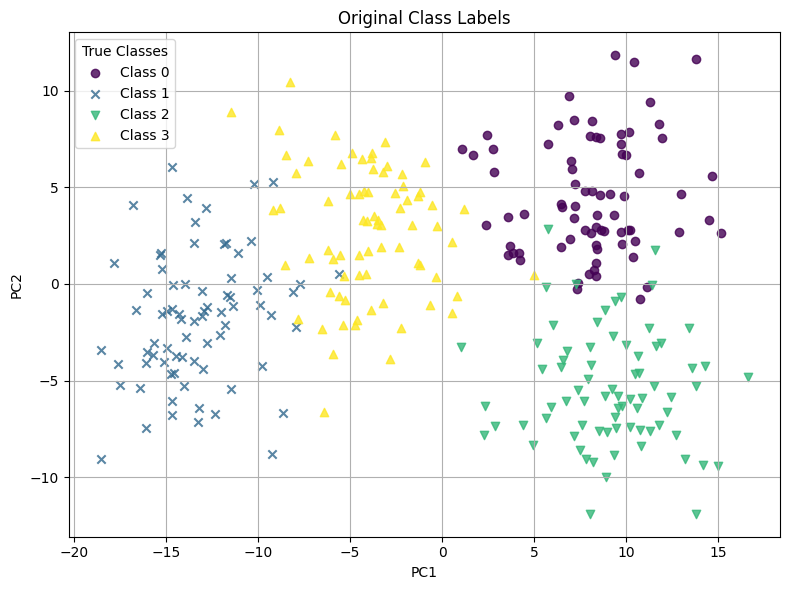

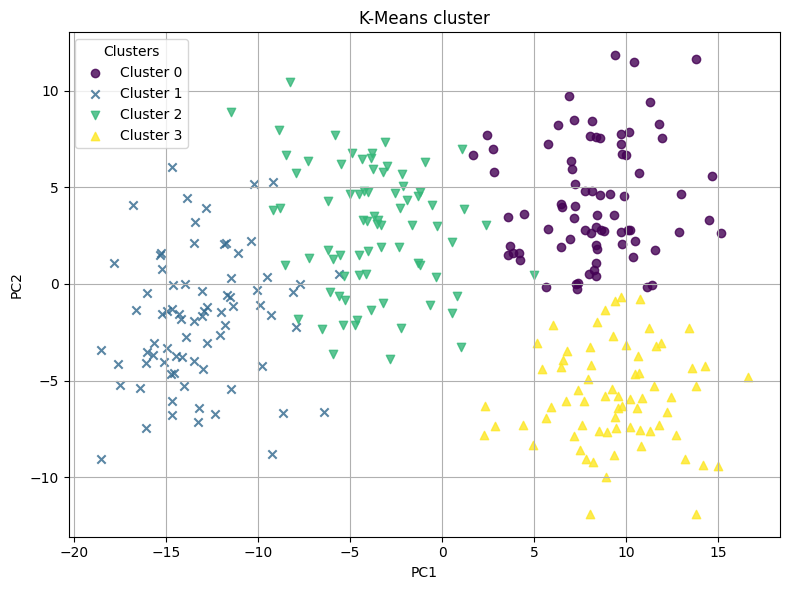

In [ ]:

from matplotlib.cm import get_cmap
#Load data
df = pd.read_csv('PADL-Q2.csv')

X = df[['X1', 'X2', 'X3', 'X4', 'X5']].values
y = df['y'].values

#number of clusters from unique labels
k = len(np.unique(y))

#k-means
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X)

#pca
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

#plots markers
markers = ['o', 'x', 'v', '^', '*']
cmap = plt.cm.viridis

#true labels plot
plt.figure(figsize=(8, 6))
for idx, label in enumerate(sorted(np.unique(y))):
    mask = (y == label)
    plt.scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        marker=markers[idx % len(markers)],
        c=[cmap(idx / (k-1))],
        label=f'Class {label}',
        alpha=0.8
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Original Class Labels')
plt.legend(title='True Classes')
plt.grid(True)
plt.tight_layout()
plt.show()

#k-means plot
plt.figure(figsize=(8, 6))
for idx, cluster in enumerate(sorted(np.unique(clusters))):
    mask = (clusters == cluster)
    plt.scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        marker=markers[idx % len(markers)],
        c=[cmap(idx / (k-1))],
        label=f'Cluster {cluster}',
        alpha=0.8
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means cluster')
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()


2b)
Make sure to run 2a first

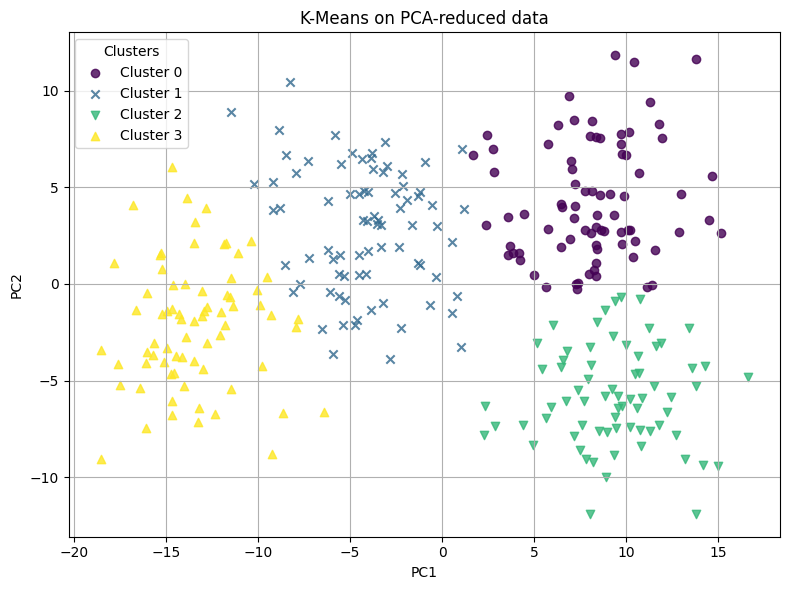

In [ ]:
#new k-means
kmeans_pca = KMeans(n_clusters=k, random_state=0)
clusters_pca = kmeans_pca.fit_predict(X_pca)

#plot
plt.figure(figsize=(8, 6))
for idx, cluster in enumerate(sorted(np.unique(clusters_pca))):
    mask = (clusters_pca == cluster)
    plt.scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        marker=markers[idx % len(markers)],
        c=[cmap(idx / (k-1))],
        label=f'Cluster {cluster}',
        alpha=0.8
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means on PCA-reduced data')
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

2c)
make sure to run 2a) and 2b) first

In [ ]:
#confusion matrix for clustering on original data
conf_matrix_original = confusion_matrix(y, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix_original)
accuracy_original = conf_matrix_original[row_ind, col_ind].sum() / np.sum(conf_matrix_original) * 100

#confusion matrix for clustering on PCA-reduced data
conf_matrix_pca = confusion_matrix(y, clusters_pca)
row_ind_pca, col_ind_pca = linear_sum_assignment(-conf_matrix_pca)
accuracy_pca = conf_matrix_pca[row_ind_pca, col_ind_pca].sum() / np.sum(conf_matrix_pca) * 100

explained_variance = np.sum(pca.explained_variance_ratio_) * 100

# Print results
print(f"Accuracy with clustering on original data: {accuracy_original:.2f}%")
print(f"Accuracy with clustering on PCA-reduced data: {accuracy_pca:.2f}%")
print(f"Variance explained by PC1 and PC2: {explained_variance:.2f}%")
print(f"Loss in clustering accuracy: {accuracy_original - accuracy_pca:.2f}%")

Accuracy with clustering on original data: 96.67%
Accuracy with clustering on PCA-reduced data: 94.67%
Variance explained by PC1 and PC2: 77.43%
Loss in clustering accuracy: 2.00%


Only a two % clustering accuracy loss when decreasing from 5 dimensions to 2, with 77.43% of information retained by PC1 and PC2.

3a)

In [ ]:
from gensim.models import Word2Vec

#load data and split and clean sentences
sentences = []
with open('PADL-Q3.txt', 'r') as f:
    for line in f:
        # split on whitespace, convert IDs to strings
        tokens = line.strip().split()
        if tokens:
            sentences.append(tokens)

#train word2vec skipgram model
model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,
    epochs=10
)

#target nodes
target = '5'
for node in map(str, range(21, 31)):
    sim = model.wv.similarity(target, node)
    print(f"Similarity({target}, {node}) = {sim:.4f}")


Similarity(5, 21) = 0.1356
Similarity(5, 22) = 0.1150
Similarity(5, 23) = 0.2757
Similarity(5, 24) = 0.2955
Similarity(5, 25) = 0.1808
Similarity(5, 26) = 0.1680
Similarity(5, 27) = 0.2183
Similarity(5, 28) = 0.2349
Similarity(5, 29) = 0.1730
Similarity(5, 30) = 0.2081


3b)
make sure to run 3a) first

In [ ]:
#sort nodes
nodes = sorted(model.wv.key_to_index.keys(), key=int)

#open file
with open('PADL-Q3-result.txt', 'w') as fout:
    #for each node, get every other node, sorted by similarity
    for k in nodes:
        sorted_nodes = [node for node, _ in model.wv.similar_by_key(k, topn=len(nodes))]
        #write
        fout.write(' '.join(sorted_nodes) + '\n')
print("Written PADL-Q3-result.txt successfully.")

Written PADL-Q3-result.txt successfully.


4a)

The network structure design is that of a Multi-Layer Perceptron (MLP). The input layer takes the selected number of features from feature engineering. The next two sequential layers of 32 neurons form a mini-residual block, with the aim of helping gradient flow during training. Layers 3 and 4 are then further reductions in neuron width, with the output layer, a single neuron, used for the prediction of the waist circumference.
ReLU is used after every hidden layer, used becuase of its non-linearity and Layer normalisation is used to stabilise training and convergence.

SmoothL1Loss is used as the regression loss function, combining the benefits of L1 and L2 loss and handling outliers better than MSE.

Feature engineering is used to create new features which can draw stronger relationships between input features and the target feature, with the most effective features selected for training with LassoCV to reduce training demands and enhance the quality of predictions.

4b) (Full Code)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler as SklearnStandardScaler
from sklearn.linear_model import LassoCV

# --------------- Enhanced model definition ---------------
class WaistPredictionNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc2b = nn.Linear(32, 32)  # Mini-residual block on 32-dim
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.out = nn.Linear(8, 1)
        self.ln1 = nn.LayerNorm(64)
        self.ln2 = nn.LayerNorm(32)

    def forward(self, x):
        x = F.relu(self.fc1(x))

        # residual mini-block
        x2 = F.relu(self.fc2(x))
        res = x2
        x2 = F.relu(self.fc2b(x2))
        x = x2 + res

        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return self.out(x)

# --------------- Training script ---------------
if __name__ == "__main__":
    # Hyperparameters
    BATCH_SIZE = 32
    LR         = 0.001
    EPOCHS     = 400
    VAL_SPLIT  = 0.2

    # Load & clean data
    df = pd.read_csv('body_measurements.csv')
    df.dropna(subset=[
        'Chest Circumference (mm)',
        'Hip Circumference (mm)',
        'Height (mm)',
        'Weight (kg)',
        'Gender',
        'Waist Circumference (mm)'
    ], inplace=True)

    # Feature engineering (before normalization)

    # BMI
    df['BMI'] = df['Weight (kg)'] / (df['Height (mm)'] / 1000) ** 2

    # Log‐transforms
    df['log_Weight'] = np.log1p(df['Weight (kg)'])
    df['log_Height'] = np.log1p(df['Height (mm)'])
    df['log_Chest']  = np.log1p(df['Chest Circumference (mm)'])
    df['log_Hip']    = np.log1p(df['Hip Circumference (mm)'])

    # Ratios & Differences
    df['Chest_to_Height']       = df['Chest Circumference (mm)'] / df['Height (mm)']
    df['Hip_to_Height']         = df['Hip Circumference (mm)']   / df['Height (mm)']
    df['Chest_to_Hip']          = df['Chest Circumference (mm)'] / df['Hip Circumference (mm)']
    df['Hip_to_Chest']          = df['Hip Circumference (mm)']   / df['Chest Circumference (mm)']
    df['Weight_to_Height']      = df['Weight (kg)']              / (df['Height (mm)'] / 1000)
    df['Height_minus_Weight']   = df['Height (mm)']             - df['Weight (kg)']

    # Higher‐order & cross‐terms
    df['BMI_sq']        = df['BMI']**2
    df['BMI_cu']        = df['BMI']**3
    df['Chest_sq']      = df['Chest Circumference (mm)']**2
    df['Hip_sq']        = df['Hip Circumference (mm)']**2
    df['Weight_x_Chest']= df['Weight (kg)'] * df['Chest Circumference (mm)']
    df['Weight_x_Hip']  = df['Weight (kg)'] * df['Hip Circumference (mm)']
    df['Height_x_BMI']  = df['Height (mm)'] * df['BMI']

    # Nonlinear transforms
    df['sqrt_Weight']  = np.sqrt(df['Weight (kg)'])
    df['cbrt_Chest']   = np.cbrt(df['Chest Circumference (mm)'])

    # Gender interactions
    for col in ['BMI', 'Chest Circumference (mm)', 'Hip Circumference (mm)']:
        df[f"{col}_x_Gender"] = df[col] * df['Gender']



    base_feats = [
        'Chest Circumference (mm)',
        'Hip Circumference (mm)',
        'Height (mm)',
        'Weight (kg)',
        'Gender',
        'BMI',
        'log_Weight', 'log_Height', 'log_Chest', 'log_Hip',
        'Chest_to_Height', 'Hip_to_Height',
        'Chest_to_Hip', 'Hip_to_Chest',
        'Weight_to_Height', 'Height_minus_Weight',
        'BMI_sq', 'BMI_cu',
        'Chest_sq', 'Hip_sq',
        'Weight_x_Chest', 'Weight_x_Hip', 'Height_x_BMI',
        'sqrt_Weight', 'cbrt_Chest',
        'BMI_x_Gender', 'Chest Circumference (mm)_x_Gender', 'Hip Circumference (mm)_x_Gender',
    ]

    # LassoCV to select features
    X_lasso = df[base_feats].values.astype(float)
    y_lasso = df['Waist Circumference (mm)'].values.astype(float)
    scaler_l = SklearnStandardScaler()
    X_scaled = scaler_l.fit_transform(X_lasso)
    lasso = LassoCV(
        cv=5,
        random_state=42,
        alphas=np.logspace(-4, 0, 50),
        max_iter=2000000,
        tol=1e-1
    )
    lasso.fit(X_scaled, y_lasso)
    coef = lasso.coef_
    abs_coefs = np.abs(coef)
    features = [f for f, c in zip(base_feats, coef) if abs(c) > 1e-2]
    print("Selected features via Lasso:", features)

    # Extract and normalize inputs
    X_raw = df[features].values.astype(float)
    mean  = X_raw.mean(axis=0, keepdims=True)
    std   = X_raw.std(axis=0,  keepdims=True) + 1e-6
    X = (X_raw - mean) / std

    # Extract target
    y = df['Waist Circumference (mm)'].values.astype(float).reshape(-1,1)

    # Build dataset & split
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(X, y)
    n_val   = int(len(dataset) * VAL_SPLIT)
    n_train = len(dataset) - n_val
    train_ds, val_ds = random_split(
        dataset, [n_train, n_val],
        generator=torch.Generator().manual_seed(42)
    )

    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE)

    # Model, loss, optimizer, scheduler
    device      = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model       = WaistPredictionNetwork(input_dim=len(features)).to(device)
    criterion   = nn.SmoothL1Loss(beta=1.0)
    optimizer   = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=0.00001)
    scheduler   = torch.optim.lr_scheduler.ReduceLROnPlateau(
                      optimizer, mode='min', factor=0.5, patience=70, verbose=True)

    best_val_mae = float('inf')

    # Training loop
    for epoch in range(1, EPOCHS + 1):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds  = model(xb)
            loss   = criterion(preds, yb)
            optimizer.zero_grad()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            train_mae = torch.stack([
                criterion(model(xb.to(device)), yb.to(device))
                for xb, yb in train_loader
            ]).mean().item()

            val_mae = torch.stack([
                criterion(model(xb.to(device)), yb.to(device))
                for xb, yb in val_loader
            ]).mean().item()

        scheduler.step(val_mae)

        if val_mae < best_val_mae:
            best_val_mae = val_mae
            torch.save(model.state_dict(), 'best_weights_waist.pkl') # Save best model
            print(f"Epoch {epoch:3d} — train MAE: {train_mae:.2f} mm, "
                  f"NEW best val MAE: {val_mae:.2f} mm (weights saved)")
        else:
            print(f"Epoch {epoch:3d} — train MAE: {train_mae:.2f} mm, val MAE: {val_mae:.2f} mm")

    # Save normalization stats
    torch.save({'mean': torch.tensor(mean).squeeze(),
                'std':  torch.tensor(std).squeeze()},
               'scaling_stats_waist.pth')

    print(f"\nTraining complete. Best validation MAE: {best_val_mae:.2f} mm")


Selected features via Lasso: ['Chest Circumference (mm)', 'Hip Circumference (mm)', 'Height (mm)', 'Weight (kg)', 'Gender', 'BMI', 'log_Weight', 'log_Height', 'log_Chest', 'log_Hip', 'Chest_to_Height', 'Hip_to_Height', 'Chest_to_Hip', 'Hip_to_Chest', 'Weight_to_Height', 'Height_minus_Weight', 'BMI_sq', 'BMI_cu', 'Chest_sq', 'Hip_sq', 'Weight_x_Chest', 'Weight_x_Hip', 'Height_x_BMI', 'sqrt_Weight', 'cbrt_Chest', 'BMI_x_Gender', 'Chest Circumference (mm)_x_Gender', 'Hip Circumference (mm)_x_Gender']


/mnt/scratch/users/tl1600/Project/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch   1 — train MAE: 851.90 mm, NEW best val MAE: 852.70 mm (weights saved)
Epoch   2 — train MAE: 763.59 mm, NEW best val MAE: 765.32 mm (weights saved)


Epoch   3 — train MAE: 375.51 mm, NEW best val MAE: 369.04 mm (weights saved)
Epoch   4 — train MAE: 278.47 mm, NEW best val MAE: 275.54 mm (weights saved)


Epoch   5 — train MAE: 200.33 mm, NEW best val MAE: 208.80 mm (weights saved)
Epoch   6 — train MAE: 152.05 mm, NEW best val MAE: 162.53 mm (weights saved)


Epoch   7 — train MAE: 118.63 mm, NEW best val MAE: 124.62 mm (weights saved)
Epoch   8 — train MAE: 85.91 mm, NEW best val MAE: 87.31 mm (weights saved)


Epoch   9 — train MAE: 59.90 mm, NEW best val MAE: 57.54 mm (weights saved)
Epoch  10 — train MAE: 43.07 mm, NEW best val MAE: 38.88 mm (weights saved)


Epoch  11 — train MAE: 41.35 mm, NEW best val MAE: 37.68 mm (weights saved)
Epoch  12 — train MAE: 37.57 mm, NEW best val MAE: 34.43 mm (weights saved)


Epoch  13 — train MAE: 41.18 mm, val MAE: 39.48 mm
Epoch  14 — train MAE: 35.47 mm, NEW best val MAE: 31.74 mm (weights saved)


Epoch  15 — train MAE: 34.31 mm, NEW best val MAE: 30.44 mm (weights saved)
Epoch  16 — train MAE: 35.12 mm, val MAE: 32.22 mm


Epoch  17 — train MAE: 33.87 mm, NEW best val MAE: 29.87 mm (weights saved)
Epoch  18 — train MAE: 34.96 mm, val MAE: 32.20 mm


Epoch  19 — train MAE: 34.17 mm, val MAE: 30.48 mm
Epoch  20 — train MAE: 33.05 mm, NEW best val MAE: 28.88 mm (weights saved)


Epoch  21 — train MAE: 35.00 mm, val MAE: 31.78 mm
Epoch  22 — train MAE: 34.54 mm, val MAE: 29.86 mm


Epoch  23 — train MAE: 33.72 mm, val MAE: 30.35 mm
Epoch  24 — train MAE: 34.47 mm, val MAE: 29.57 mm


Epoch  25 — train MAE: 33.95 mm, val MAE: 30.94 mm
Epoch  26 — train MAE: 37.33 mm, val MAE: 34.12 mm


Epoch  27 — train MAE: 32.98 mm, val MAE: 29.36 mm
Epoch  28 — train MAE: 35.30 mm, val MAE: 31.79 mm


Epoch  29 — train MAE: 35.39 mm, val MAE: 31.00 mm
Epoch  30 — train MAE: 33.17 mm, val MAE: 29.31 mm


Epoch  31 — train MAE: 33.67 mm, val MAE: 30.19 mm
Epoch  32 — train MAE: 34.60 mm, val MAE: 30.68 mm


Epoch  33 — train MAE: 32.59 mm, NEW best val MAE: 28.76 mm (weights saved)
Epoch  34 — train MAE: 33.04 mm, val MAE: 29.98 mm


Epoch  35 — train MAE: 33.03 mm, val MAE: 29.57 mm
Epoch  36 — train MAE: 34.10 mm, val MAE: 29.01 mm


Epoch  37 — train MAE: 34.02 mm, val MAE: 30.05 mm
Epoch  38 — train MAE: 32.87 mm, NEW best val MAE: 28.24 mm (weights saved)


Epoch  39 — train MAE: 33.01 mm, val MAE: 29.27 mm
Epoch  40 — train MAE: 33.24 mm, val MAE: 28.81 mm


Epoch  41 — train MAE: 35.24 mm, val MAE: 31.78 mm
Epoch  42 — train MAE: 32.62 mm, val MAE: 29.28 mm


Epoch  43 — train MAE: 34.79 mm, val MAE: 31.94 mm
Epoch  44 — train MAE: 33.07 mm, val MAE: 28.87 mm


Epoch  45 — train MAE: 34.58 mm, val MAE: 31.89 mm
Epoch  46 — train MAE: 33.10 mm, val MAE: 28.29 mm


Epoch  47 — train MAE: 33.41 mm, val MAE: 30.10 mm
Epoch  48 — train MAE: 33.40 mm, val MAE: 30.00 mm


Epoch  49 — train MAE: 33.12 mm, val MAE: 30.70 mm
Epoch  50 — train MAE: 32.84 mm, val MAE: 30.06 mm


Epoch  51 — train MAE: 34.38 mm, val MAE: 30.49 mm
Epoch  52 — train MAE: 35.10 mm, val MAE: 33.02 mm


Epoch  53 — train MAE: 34.01 mm, val MAE: 28.95 mm
Epoch  54 — train MAE: 37.54 mm, val MAE: 35.62 mm


Epoch  55 — train MAE: 32.69 mm, val MAE: 29.37 mm
Epoch  56 — train MAE: 33.34 mm, val MAE: 28.76 mm


Epoch  57 — train MAE: 33.24 mm, val MAE: 30.57 mm
Epoch  58 — train MAE: 33.10 mm, val MAE: 29.45 mm


Epoch  59 — train MAE: 32.73 mm, val MAE: 29.10 mm
Epoch  60 — train MAE: 33.27 mm, val MAE: 29.86 mm


Epoch  61 — train MAE: 32.43 mm, val MAE: 28.53 mm
Epoch  62 — train MAE: 32.74 mm, val MAE: 30.40 mm


Epoch  63 — train MAE: 32.93 mm, val MAE: 29.61 mm
Epoch  64 — train MAE: 32.54 mm, val MAE: 29.37 mm


Epoch  65 — train MAE: 33.21 mm, val MAE: 29.67 mm
Epoch  66 — train MAE: 32.76 mm, val MAE: 29.17 mm


Epoch  67 — train MAE: 32.30 mm, val MAE: 29.22 mm
Epoch  68 — train MAE: 32.69 mm, val MAE: 29.60 mm


Epoch  69 — train MAE: 32.72 mm, val MAE: 28.93 mm
Epoch  70 — train MAE: 33.54 mm, val MAE: 30.34 mm


Epoch  71 — train MAE: 33.01 mm, val MAE: 29.74 mm
Epoch  72 — train MAE: 32.50 mm, val MAE: 29.24 mm


Epoch  73 — train MAE: 33.32 mm, val MAE: 31.12 mm
Epoch  74 — train MAE: 34.24 mm, val MAE: 30.09 mm


Epoch  75 — train MAE: 33.36 mm, val MAE: 31.86 mm
Epoch  76 — train MAE: 33.17 mm, val MAE: 30.14 mm


Epoch  77 — train MAE: 36.90 mm, val MAE: 36.03 mm
Epoch  78 — train MAE: 32.09 mm, val MAE: 29.28 mm


Epoch  79 — train MAE: 36.28 mm, val MAE: 32.55 mm
Epoch  80 — train MAE: 33.80 mm, val MAE: 28.89 mm


Epoch  81 — train MAE: 32.37 mm, val MAE: 29.08 mm
Epoch  82 — train MAE: 33.51 mm, val MAE: 29.55 mm


Epoch  83 — train MAE: 34.04 mm, val MAE: 29.08 mm
Epoch  84 — train MAE: 33.97 mm, val MAE: 30.14 mm


Epoch  85 — train MAE: 35.72 mm, val MAE: 32.88 mm
Epoch  86 — train MAE: 32.66 mm, val MAE: 28.97 mm


Epoch  87 — train MAE: 32.79 mm, val MAE: 30.26 mm
Epoch  88 — train MAE: 32.44 mm, val MAE: 29.12 mm


Epoch  89 — train MAE: 33.43 mm, val MAE: 29.18 mm
Epoch  90 — train MAE: 33.16 mm, val MAE: 29.66 mm


Epoch  91 — train MAE: 32.39 mm, val MAE: 29.88 mm
Epoch  92 — train MAE: 34.05 mm, val MAE: 30.97 mm


Epoch  93 — train MAE: 33.83 mm, val MAE: 29.94 mm
Epoch  94 — train MAE: 32.40 mm, val MAE: 29.57 mm


Epoch  95 — train MAE: 37.53 mm, val MAE: 35.65 mm
Epoch  96 — train MAE: 32.44 mm, val MAE: 29.07 mm


Epoch  97 — train MAE: 33.40 mm, val MAE: 31.40 mm
Epoch  98 — train MAE: 33.45 mm, val MAE: 30.81 mm


Epoch  99 — train MAE: 32.80 mm, val MAE: 28.39 mm
Epoch 100 — train MAE: 32.49 mm, val MAE: 28.64 mm


Epoch 101 — train MAE: 32.53 mm, val MAE: 28.51 mm
Epoch 102 — train MAE: 32.80 mm, val MAE: 30.07 mm


Epoch 103 — train MAE: 32.84 mm, val MAE: 29.01 mm
Epoch 104 — train MAE: 33.29 mm, val MAE: 29.92 mm


Epoch 105 — train MAE: 34.42 mm, val MAE: 32.72 mm
Epoch 106 — train MAE: 33.21 mm, val MAE: 30.03 mm


Epoch 107 — train MAE: 32.92 mm, val MAE: 31.05 mm
Epoch 108 — train MAE: 34.41 mm, val MAE: 30.40 mm


Epoch 109 — train MAE: 32.63 mm, val MAE: 28.97 mm
Epoch 110 — train MAE: 32.36 mm, val MAE: 29.59 mm


Epoch 111 — train MAE: 33.83 mm, val MAE: 31.20 mm
Epoch 112 — train MAE: 32.81 mm, val MAE: 30.45 mm


Epoch 113 — train MAE: 32.20 mm, val MAE: 29.43 mm
Epoch 114 — train MAE: 32.54 mm, val MAE: 28.81 mm


Epoch 115 — train MAE: 32.31 mm, val MAE: 29.02 mm
Epoch 116 — train MAE: 32.46 mm, val MAE: 29.38 mm


Epoch 117 — train MAE: 32.50 mm, val MAE: 28.69 mm
Epoch 118 — train MAE: 31.98 mm, val MAE: 28.61 mm


Epoch 119 — train MAE: 31.98 mm, val MAE: 28.96 mm
Epoch 120 — train MAE: 32.38 mm, val MAE: 28.63 mm


Epoch 121 — train MAE: 32.11 mm, val MAE: 29.39 mm
Epoch 122 — train MAE: 32.44 mm, val MAE: 29.95 mm


Epoch 123 — train MAE: 32.10 mm, val MAE: 29.22 mm
Epoch 124 — train MAE: 32.15 mm, val MAE: 28.74 mm


Epoch 125 — train MAE: 32.63 mm, val MAE: 28.62 mm
Epoch 126 — train MAE: 32.67 mm, val MAE: 30.30 mm


Epoch 127 — train MAE: 33.21 mm, val MAE: 30.04 mm
Epoch 128 — train MAE: 32.51 mm, val MAE: 28.96 mm


Epoch 129 — train MAE: 32.12 mm, val MAE: 29.25 mm
Epoch 130 — train MAE: 33.12 mm, val MAE: 29.76 mm


Epoch 131 — train MAE: 33.27 mm, val MAE: 28.59 mm
Epoch 132 — train MAE: 32.57 mm, val MAE: 29.19 mm


Epoch 133 — train MAE: 32.37 mm, val MAE: 29.71 mm
Epoch 134 — train MAE: 32.14 mm, val MAE: 29.29 mm


Epoch 135 — train MAE: 34.00 mm, val MAE: 30.36 mm
Epoch 136 — train MAE: 32.32 mm, val MAE: 29.34 mm


Epoch 137 — train MAE: 32.31 mm, val MAE: 29.65 mm
Epoch 138 — train MAE: 32.82 mm, val MAE: 29.40 mm


Epoch 139 — train MAE: 31.88 mm, val MAE: 28.70 mm
Epoch 140 — train MAE: 32.55 mm, val MAE: 29.78 mm


Epoch 141 — train MAE: 32.05 mm, val MAE: 28.35 mm
Epoch 142 — train MAE: 31.95 mm, val MAE: 29.57 mm


Epoch 143 — train MAE: 32.02 mm, val MAE: 29.10 mm
Epoch 144 — train MAE: 32.08 mm, val MAE: 28.86 mm


Epoch 145 — train MAE: 32.75 mm, val MAE: 29.32 mm
Epoch 146 — train MAE: 32.58 mm, val MAE: 28.76 mm


Epoch 147 — train MAE: 32.31 mm, val MAE: 28.71 mm
Epoch 148 — train MAE: 33.12 mm, val MAE: 29.75 mm


Epoch 149 — train MAE: 32.84 mm, val MAE: 29.54 mm
Epoch 150 — train MAE: 31.91 mm, val MAE: 28.88 mm


Epoch 151 — train MAE: 32.41 mm, val MAE: 28.58 mm
Epoch 152 — train MAE: 32.05 mm, val MAE: 29.19 mm


Epoch 153 — train MAE: 32.29 mm, val MAE: 28.94 mm
Epoch 154 — train MAE: 32.46 mm, val MAE: 28.66 mm


Epoch 155 — train MAE: 32.25 mm, val MAE: 29.35 mm
Epoch 156 — train MAE: 32.99 mm, val MAE: 29.47 mm


Epoch 157 — train MAE: 32.17 mm, val MAE: 29.09 mm
Epoch 158 — train MAE: 32.32 mm, val MAE: 30.35 mm


Epoch 159 — train MAE: 32.56 mm, val MAE: 29.40 mm
Epoch 160 — train MAE: 32.27 mm, val MAE: 30.03 mm


Epoch 161 — train MAE: 32.16 mm, val MAE: 29.19 mm
Epoch 162 — train MAE: 31.86 mm, val MAE: 28.94 mm


Epoch 163 — train MAE: 32.70 mm, val MAE: 29.31 mm
Epoch 164 — train MAE: 33.31 mm, val MAE: 30.65 mm


Epoch 165 — train MAE: 32.64 mm, val MAE: 29.04 mm
Epoch 166 — train MAE: 33.23 mm, val MAE: 30.31 mm


Epoch 167 — train MAE: 32.22 mm, val MAE: 29.38 mm
Epoch 168 — train MAE: 31.78 mm, val MAE: 28.88 mm


Epoch 169 — train MAE: 32.45 mm, val MAE: 29.13 mm
Epoch 170 — train MAE: 32.87 mm, val MAE: 29.16 mm


Epoch 171 — train MAE: 31.96 mm, val MAE: 28.80 mm
Epoch 172 — train MAE: 32.03 mm, val MAE: 29.62 mm


Epoch 173 — train MAE: 33.80 mm, val MAE: 30.69 mm
Epoch 174 — train MAE: 32.69 mm, val MAE: 30.54 mm


Epoch 175 — train MAE: 32.51 mm, val MAE: 30.02 mm
Epoch 176 — train MAE: 32.03 mm, val MAE: 29.47 mm


Epoch 177 — train MAE: 31.93 mm, val MAE: 29.47 mm
Epoch 178 — train MAE: 32.28 mm, val MAE: 28.80 mm


Epoch 179 — train MAE: 32.41 mm, val MAE: 30.61 mm
Epoch 180 — train MAE: 32.23 mm, val MAE: 29.01 mm


Epoch 181 — train MAE: 31.80 mm, val MAE: 29.21 mm
Epoch 182 — train MAE: 31.80 mm, val MAE: 29.64 mm


Epoch 183 — train MAE: 31.87 mm, val MAE: 29.45 mm
Epoch 184 — train MAE: 32.45 mm, val MAE: 29.13 mm


Epoch 185 — train MAE: 32.37 mm, val MAE: 29.30 mm
Epoch 186 — train MAE: 31.87 mm, val MAE: 28.76 mm


Epoch 187 — train MAE: 31.85 mm, val MAE: 29.18 mm
Epoch 188 — train MAE: 31.74 mm, val MAE: 28.58 mm


Epoch 189 — train MAE: 31.87 mm, val MAE: 29.46 mm
Epoch 190 — train MAE: 32.01 mm, val MAE: 29.76 mm


Epoch 191 — train MAE: 31.84 mm, val MAE: 28.95 mm
Epoch 192 — train MAE: 31.96 mm, val MAE: 29.73 mm


Epoch 193 — train MAE: 31.96 mm, val MAE: 28.49 mm
Epoch 194 — train MAE: 31.73 mm, val MAE: 29.07 mm


Epoch 195 — train MAE: 31.74 mm, val MAE: 29.17 mm
Epoch 196 — train MAE: 31.92 mm, val MAE: 29.27 mm


Epoch 197 — train MAE: 31.81 mm, val MAE: 29.60 mm
Epoch 198 — train MAE: 32.01 mm, val MAE: 29.18 mm


Epoch 199 — train MAE: 31.88 mm, val MAE: 28.73 mm
Epoch 200 — train MAE: 31.87 mm, val MAE: 28.56 mm


Epoch 201 — train MAE: 31.63 mm, val MAE: 28.85 mm
Epoch 202 — train MAE: 31.99 mm, val MAE: 29.19 mm


Epoch 203 — train MAE: 31.62 mm, val MAE: 28.96 mm
Epoch 204 — train MAE: 31.71 mm, val MAE: 29.13 mm


Epoch 205 — train MAE: 31.96 mm, val MAE: 29.10 mm
Epoch 206 — train MAE: 32.50 mm, val MAE: 29.74 mm


Epoch 207 — train MAE: 31.84 mm, val MAE: 29.26 mm
Epoch 208 — train MAE: 31.84 mm, val MAE: 28.83 mm


Epoch 209 — train MAE: 32.37 mm, val MAE: 29.68 mm
Epoch 210 — train MAE: 31.87 mm, val MAE: 29.38 mm


Epoch 211 — train MAE: 31.75 mm, val MAE: 28.86 mm
Epoch 212 — train MAE: 31.74 mm, val MAE: 28.97 mm


Epoch 213 — train MAE: 31.80 mm, val MAE: 29.25 mm
Epoch 214 — train MAE: 31.79 mm, val MAE: 29.53 mm


Epoch 215 — train MAE: 31.81 mm, val MAE: 28.95 mm
Epoch 216 — train MAE: 31.73 mm, val MAE: 29.04 mm


Epoch 217 — train MAE: 32.07 mm, val MAE: 28.64 mm
Epoch 218 — train MAE: 31.88 mm, val MAE: 29.57 mm


Epoch 219 — train MAE: 31.77 mm, val MAE: 29.49 mm
Epoch 220 — train MAE: 31.99 mm, val MAE: 29.63 mm


Epoch 221 — train MAE: 31.73 mm, val MAE: 28.89 mm
Epoch 222 — train MAE: 31.87 mm, val MAE: 28.80 mm


Epoch 223 — train MAE: 32.07 mm, val MAE: 29.47 mm
Epoch 224 — train MAE: 31.75 mm, val MAE: 29.18 mm


Epoch 225 — train MAE: 31.75 mm, val MAE: 28.69 mm
Epoch 226 — train MAE: 32.20 mm, val MAE: 29.15 mm


Epoch 227 — train MAE: 31.76 mm, val MAE: 29.53 mm
Epoch 228 — train MAE: 31.63 mm, val MAE: 29.40 mm


Epoch 229 — train MAE: 31.62 mm, val MAE: 28.85 mm
Epoch 230 — train MAE: 31.51 mm, val MAE: 28.93 mm


Epoch 231 — train MAE: 31.76 mm, val MAE: 29.19 mm
Epoch 232 — train MAE: 31.76 mm, val MAE: 29.42 mm


Epoch 233 — train MAE: 31.78 mm, val MAE: 29.57 mm
Epoch 234 — train MAE: 31.96 mm, val MAE: 29.11 mm


Epoch 235 — train MAE: 31.77 mm, val MAE: 29.13 mm
Epoch 236 — train MAE: 31.80 mm, val MAE: 29.18 mm


Epoch 237 — train MAE: 31.95 mm, val MAE: 29.78 mm
Epoch 238 — train MAE: 31.74 mm, val MAE: 29.00 mm


Epoch 239 — train MAE: 31.79 mm, val MAE: 29.29 mm
Epoch 240 — train MAE: 31.84 mm, val MAE: 29.52 mm


Epoch 241 — train MAE: 31.92 mm, val MAE: 29.27 mm
Epoch 242 — train MAE: 31.88 mm, val MAE: 28.84 mm


Epoch 243 — train MAE: 31.85 mm, val MAE: 29.14 mm
Epoch 244 — train MAE: 31.96 mm, val MAE: 29.55 mm


Epoch 245 — train MAE: 31.68 mm, val MAE: 29.51 mm
Epoch 246 — train MAE: 31.64 mm, val MAE: 28.91 mm


Epoch 247 — train MAE: 31.83 mm, val MAE: 29.29 mm
Epoch 248 — train MAE: 32.08 mm, val MAE: 29.24 mm


Epoch 249 — train MAE: 32.78 mm, val MAE: 29.56 mm
Epoch 250 — train MAE: 31.69 mm, val MAE: 28.78 mm


Epoch 251 — train MAE: 31.93 mm, val MAE: 29.86 mm
Epoch 252 — train MAE: 31.72 mm, val MAE: 29.45 mm


Epoch 253 — train MAE: 31.54 mm, val MAE: 29.13 mm
Epoch 254 — train MAE: 31.58 mm, val MAE: 29.13 mm


Epoch 255 — train MAE: 31.53 mm, val MAE: 29.54 mm
Epoch 256 — train MAE: 31.85 mm, val MAE: 29.69 mm


Epoch 257 — train MAE: 31.59 mm, val MAE: 29.24 mm
Epoch 258 — train MAE: 31.56 mm, val MAE: 29.34 mm


Epoch 259 — train MAE: 31.89 mm, val MAE: 29.35 mm
Epoch 260 — train MAE: 31.67 mm, val MAE: 29.30 mm


Epoch 261 — train MAE: 31.60 mm, val MAE: 29.39 mm
Epoch 262 — train MAE: 31.64 mm, val MAE: 28.89 mm


Epoch 263 — train MAE: 31.80 mm, val MAE: 29.16 mm
Epoch 264 — train MAE: 31.47 mm, val MAE: 29.21 mm


Epoch 265 — train MAE: 31.67 mm, val MAE: 29.11 mm
Epoch 266 — train MAE: 31.55 mm, val MAE: 29.04 mm


Epoch 267 — train MAE: 31.70 mm, val MAE: 29.31 mm
Epoch 268 — train MAE: 31.60 mm, val MAE: 29.06 mm


Epoch 269 — train MAE: 31.64 mm, val MAE: 29.49 mm
Epoch 270 — train MAE: 31.50 mm, val MAE: 29.12 mm


Epoch 271 — train MAE: 31.52 mm, val MAE: 29.29 mm
Epoch 272 — train MAE: 31.75 mm, val MAE: 29.18 mm


Epoch 273 — train MAE: 31.47 mm, val MAE: 29.29 mm
Epoch 274 — train MAE: 31.63 mm, val MAE: 29.09 mm


Epoch 275 — train MAE: 31.46 mm, val MAE: 29.37 mm
Epoch 276 — train MAE: 31.60 mm, val MAE: 29.33 mm


Epoch 277 — train MAE: 31.72 mm, val MAE: 29.52 mm
Epoch 278 — train MAE: 31.83 mm, val MAE: 29.52 mm


Epoch 279 — train MAE: 31.51 mm, val MAE: 29.23 mm
Epoch 280 — train MAE: 31.62 mm, val MAE: 29.55 mm


Epoch 281 — train MAE: 31.75 mm, val MAE: 29.23 mm
Epoch 282 — train MAE: 31.70 mm, val MAE: 29.03 mm


Epoch 283 — train MAE: 31.66 mm, val MAE: 29.04 mm
Epoch 284 — train MAE: 31.81 mm, val MAE: 29.26 mm


Epoch 285 — train MAE: 31.66 mm, val MAE: 29.54 mm
Epoch 286 — train MAE: 31.47 mm, val MAE: 29.22 mm


Epoch 287 — train MAE: 31.61 mm, val MAE: 29.43 mm
Epoch 288 — train MAE: 31.77 mm, val MAE: 29.55 mm


Epoch 289 — train MAE: 31.61 mm, val MAE: 29.32 mm
Epoch 290 — train MAE: 31.59 mm, val MAE: 29.07 mm


Epoch 291 — train MAE: 31.79 mm, val MAE: 29.28 mm
Epoch 292 — train MAE: 31.65 mm, val MAE: 29.40 mm


Epoch 293 — train MAE: 31.58 mm, val MAE: 29.12 mm
Epoch 294 — train MAE: 31.83 mm, val MAE: 29.62 mm


Epoch 295 — train MAE: 31.65 mm, val MAE: 29.40 mm
Epoch 296 — train MAE: 31.66 mm, val MAE: 29.08 mm


Epoch 297 — train MAE: 31.44 mm, val MAE: 29.29 mm
Epoch 298 — train MAE: 31.73 mm, val MAE: 29.00 mm


Epoch 299 — train MAE: 31.72 mm, val MAE: 29.83 mm
Epoch 300 — train MAE: 31.49 mm, val MAE: 29.20 mm


Epoch 301 — train MAE: 31.65 mm, val MAE: 29.24 mm
Epoch 302 — train MAE: 31.87 mm, val MAE: 29.44 mm


Epoch 303 — train MAE: 31.58 mm, val MAE: 29.19 mm
Epoch 304 — train MAE: 31.52 mm, val MAE: 29.20 mm


Epoch 305 — train MAE: 31.65 mm, val MAE: 29.68 mm
Epoch 306 — train MAE: 31.49 mm, val MAE: 29.00 mm


Epoch 307 — train MAE: 31.62 mm, val MAE: 29.34 mm
Epoch 308 — train MAE: 31.58 mm, val MAE: 29.42 mm


Epoch 309 — train MAE: 31.44 mm, val MAE: 29.30 mm
Epoch 310 — train MAE: 32.01 mm, val MAE: 29.55 mm


Epoch 311 — train MAE: 31.64 mm, val MAE: 29.35 mm
Epoch 312 — train MAE: 31.82 mm, val MAE: 29.41 mm


Epoch 313 — train MAE: 31.57 mm, val MAE: 29.27 mm
Epoch 314 — train MAE: 31.45 mm, val MAE: 29.21 mm


Epoch 315 — train MAE: 31.51 mm, val MAE: 29.42 mm
Epoch 316 — train MAE: 31.43 mm, val MAE: 29.16 mm


Epoch 317 — train MAE: 31.68 mm, val MAE: 29.34 mm
Epoch 318 — train MAE: 31.55 mm, val MAE: 29.22 mm


Epoch 319 — train MAE: 31.48 mm, val MAE: 29.25 mm
Epoch 320 — train MAE: 31.55 mm, val MAE: 29.15 mm


Epoch 321 — train MAE: 31.75 mm, val MAE: 29.47 mm
Epoch 322 — train MAE: 31.57 mm, val MAE: 29.53 mm


Epoch 323 — train MAE: 31.43 mm, val MAE: 29.18 mm
Epoch 324 — train MAE: 31.55 mm, val MAE: 29.17 mm


Epoch 325 — train MAE: 31.61 mm, val MAE: 29.28 mm
Epoch 326 — train MAE: 31.53 mm, val MAE: 29.30 mm


Epoch 327 — train MAE: 31.59 mm, val MAE: 29.16 mm
Epoch 328 — train MAE: 31.54 mm, val MAE: 29.27 mm


Epoch 329 — train MAE: 31.56 mm, val MAE: 29.16 mm
Epoch 330 — train MAE: 31.60 mm, val MAE: 29.29 mm


Epoch 331 — train MAE: 31.56 mm, val MAE: 29.32 mm
Epoch 332 — train MAE: 31.58 mm, val MAE: 29.09 mm


Epoch 333 — train MAE: 31.64 mm, val MAE: 29.29 mm
Epoch 334 — train MAE: 31.52 mm, val MAE: 29.29 mm


Epoch 335 — train MAE: 31.51 mm, val MAE: 29.25 mm
Epoch 336 — train MAE: 31.59 mm, val MAE: 29.39 mm


Epoch 337 — train MAE: 31.52 mm, val MAE: 29.32 mm
Epoch 338 — train MAE: 31.52 mm, val MAE: 29.21 mm


Epoch 339 — train MAE: 31.58 mm, val MAE: 29.30 mm
Epoch 340 — train MAE: 31.48 mm, val MAE: 29.16 mm


Epoch 341 — train MAE: 31.43 mm, val MAE: 29.32 mm
Epoch 342 — train MAE: 31.51 mm, val MAE: 29.21 mm


Epoch 343 — train MAE: 31.54 mm, val MAE: 29.35 mm
Epoch 344 — train MAE: 31.55 mm, val MAE: 29.23 mm


Epoch 345 — train MAE: 31.49 mm, val MAE: 29.23 mm
Epoch 346 — train MAE: 31.55 mm, val MAE: 29.20 mm


Epoch 347 — train MAE: 31.53 mm, val MAE: 29.31 mm
Epoch 348 — train MAE: 31.43 mm, val MAE: 29.19 mm


Epoch 349 — train MAE: 31.53 mm, val MAE: 29.18 mm
Epoch 350 — train MAE: 31.49 mm, val MAE: 29.34 mm


Epoch 351 — train MAE: 31.46 mm, val MAE: 29.15 mm
Epoch 352 — train MAE: 31.41 mm, val MAE: 29.20 mm


Epoch 353 — train MAE: 31.64 mm, val MAE: 29.38 mm
Epoch 354 — train MAE: 31.48 mm, val MAE: 29.30 mm


Epoch 355 — train MAE: 31.70 mm, val MAE: 29.36 mm
Epoch 356 — train MAE: 31.49 mm, val MAE: 29.24 mm


Epoch 357 — train MAE: 31.48 mm, val MAE: 29.20 mm
Epoch 358 — train MAE: 31.56 mm, val MAE: 29.34 mm


Epoch 359 — train MAE: 31.36 mm, val MAE: 29.19 mm
Epoch 360 — train MAE: 31.46 mm, val MAE: 29.29 mm


Epoch 361 — train MAE: 31.43 mm, val MAE: 29.42 mm
Epoch 362 — train MAE: 31.50 mm, val MAE: 29.15 mm


Epoch 363 — train MAE: 31.51 mm, val MAE: 29.20 mm
Epoch 364 — train MAE: 31.45 mm, val MAE: 29.18 mm


Epoch 365 — train MAE: 31.53 mm, val MAE: 29.27 mm
Epoch 366 — train MAE: 31.46 mm, val MAE: 29.22 mm


Epoch 367 — train MAE: 31.59 mm, val MAE: 29.31 mm
Epoch 368 — train MAE: 31.54 mm, val MAE: 29.17 mm


Epoch 369 — train MAE: 31.38 mm, val MAE: 29.22 mm
Epoch 370 — train MAE: 31.60 mm, val MAE: 29.17 mm


Epoch 371 — train MAE: 31.56 mm, val MAE: 29.24 mm
Epoch 372 — train MAE: 31.53 mm, val MAE: 29.24 mm


Epoch 373 — train MAE: 31.48 mm, val MAE: 29.12 mm
Epoch 374 — train MAE: 31.52 mm, val MAE: 29.20 mm


Epoch 375 — train MAE: 31.45 mm, val MAE: 29.29 mm
Epoch 376 — train MAE: 31.63 mm, val MAE: 29.41 mm


Epoch 377 — train MAE: 31.50 mm, val MAE: 29.31 mm
Epoch 378 — train MAE: 31.40 mm, val MAE: 29.28 mm
Epoch 379 — train MAE: 31.58 mm, val MAE: 29.25 mm


Epoch 380 — train MAE: 31.47 mm, val MAE: 29.29 mm
Epoch 381 — train MAE: 31.47 mm, val MAE: 29.26 mm


Epoch 382 — train MAE: 31.64 mm, val MAE: 29.38 mm
Epoch 383 — train MAE: 31.69 mm, val MAE: 29.39 mm


Epoch 384 — train MAE: 31.43 mm, val MAE: 29.20 mm
Epoch 385 — train MAE: 31.45 mm, val MAE: 29.19 mm


Epoch 386 — train MAE: 31.43 mm, val MAE: 29.14 mm
Epoch 387 — train MAE: 31.53 mm, val MAE: 29.35 mm


Epoch 388 — train MAE: 31.57 mm, val MAE: 29.32 mm
Epoch 389 — train MAE: 31.56 mm, val MAE: 29.31 mm


Epoch 390 — train MAE: 31.33 mm, val MAE: 29.12 mm
Epoch 391 — train MAE: 31.33 mm, val MAE: 29.21 mm


Epoch 392 — train MAE: 31.47 mm, val MAE: 29.23 mm
Epoch 393 — train MAE: 31.48 mm, val MAE: 29.12 mm


Epoch 394 — train MAE: 31.50 mm, val MAE: 29.19 mm
Epoch 395 — train MAE: 31.42 mm, val MAE: 29.25 mm


Epoch 396 — train MAE: 31.48 mm, val MAE: 29.15 mm
Epoch 397 — train MAE: 31.44 mm, val MAE: 29.21 mm


Epoch 398 — train MAE: 31.36 mm, val MAE: 29.20 mm
Epoch 399 — train MAE: 31.50 mm, val MAE: 29.30 mm


Epoch 400 — train MAE: 31.48 mm, val MAE: 29.17 mm

Training complete. Best validation MAE: 28.24 mm


5a)

The architecture is a Convolutional Neural Network (CNN) which is enhanced with the use of Squeeze-and-Excitation (SE) blocks. The model features five convolutional layers with increasing channel sizes to allow low to high-level features to be captured. Batch normalisation helps to regularise and stabilise training, with Mish (activation) used due to its superior gradient flow compared with ReLU.

The SE blocks allow the model to focus on more important features of an image and can extract connections sometimes missed by more standard structures. The use of these structures improves the model's performance with a relatively low increase in computational demands. MaxPooling is used after each SE block to reduce spatial dimensions and assist in regularisation, preventing overfitting.

Three simple augementations are used on the Image set, RandomResizedCrop, ColourJitter and image normalisation, this is done to introduce noise to the training data which aims to imrpoved the model's ability to generalise.

CrossEntropyLoss and Adam are used - both standard and widely used due to a good basline ability across a range of tasks. CosineAnnealingLR Scheduler is used for its ability to generalise well, especially towards the end of training.

5b) (Full Code)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import random
import numpy as np

# Seeding to prevent randomness between runs
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


# Hyperparameters & Paths
DATA_DIR       = 'garment_images'
MODEL_PATH     = 'garment_cnn.pkl'
EPOCHS         = 150
BATCH_SIZE     = 32
LEARNING_RATE  = 1e-3
VAL_SPLIT      = 0.1
NUM_CLASSES    = 3
DEVICE         = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {DEVICE}")

# Compute dataset statistics for normalization
stat_ds     = datasets.ImageFolder(DATA_DIR, transform=transforms.ToTensor())
stat_loader = DataLoader(stat_ds, batch_size=64, shuffle=False, num_workers=16)

means = torch.zeros(3)
stds  = torch.zeros(3)
n     = 0
for imgs, _ in stat_loader:
    B = imgs.size(0)
    imgs = imgs.view(B, 3, -1)
    means += imgs.mean(2).sum(0)
    stds  += imgs.std(2).sum(0)
    n     += B

means /= n
stds  /= n
print(f"Computed dataset mean: {means.tolist()}")
print(f"Computed dataset std : {stds.tolist()}")

# Data Loading (augmentation + normalization)
transform = transforms.Compose([
    transforms.RandomResizedCrop(256, scale=(0.5,1.0), ratio=(0.75,1.33)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2,
                           saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=means.tolist(), std=stds.tolist())
])

full_dataset = datasets.ImageFolder(DATA_DIR, transform=transform)

# Data split: training & validation
n_total = len(full_dataset)
n_val   = int(n_total * VAL_SPLIT)
n_train = n_total - n_val
g = torch.Generator().manual_seed(SEED)
train_ds, val_ds = random_split(full_dataset, [n_train, n_val], generator=g)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=16, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=16, pin_memory=True)

# SE Block Definition
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.Mish(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avgpool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

# Model structure
class GarmentCNN(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 5, padding=2, dilation=2), nn.BatchNorm2d(32), nn.Mish(inplace=True),
            SEBlock(32), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, padding=2, dilation=2), nn.BatchNorm2d(64), nn.Mish(inplace=True),
            SEBlock(64), nn.MaxPool2d(2),
            nn.Conv2d(64,128, 5, padding=2, dilation=2), nn.BatchNorm2d(128), nn.Mish(inplace=True),
            SEBlock(128), nn.MaxPool2d(2),
            nn.Conv2d(128,256, 5, padding=2, dilation=2), nn.BatchNorm2d(256), nn.Mish(inplace=True),
            SEBlock(256), nn.MaxPool2d(2),
            nn.Conv2d(256,512, 5, padding=2, dilation=2), nn.BatchNorm2d(512), nn.Mish(inplace=True),
            SEBlock(512),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Training
def train_epoch(model, loader, criterion, optimizer, scheduler):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for imgs, targets in loader:
        imgs, targets = imgs.to(DEVICE), targets.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == targets).sum().item()
        total += imgs.size(0)
    scheduler.step()
    return running_loss / total, correct / total

# Evaluate
def eval_epoch(model, loader, criterion):
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for imgs, targets in loader:
            imgs, targets = imgs.to(DEVICE), targets.to(DEVICE)
            outputs = model(imgs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * imgs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == targets).sum().item()
            total += imgs.size(0)
    return val_loss / total, correct / total

model = GarmentCNN(num_classes=NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

best_val_acc = 0.0
# Train and Evaluate
for epoch in range(1, EPOCHS+1):
    print(f"\nEpoch {epoch}/{EPOCHS}")
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scheduler)
    val_loss, val_acc     = eval_epoch(model, val_loader, criterion)

    print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), MODEL_PATH) #Save best model

print(f"\nTraining complete. Best validation accuracy: {best_val_acc:.4f}")
print(f"Model saved to {MODEL_PATH}")

Using device: cuda


/mnt/scratch/users/tl1600/Project/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Computed dataset mean: [0.6970945000648499, 0.6707542538642883, 0.6784442067146301]
Computed dataset std : [0.28497767448425293, 0.3031124472618103, 0.2961891293525696]

Epoch 1/150


Train Loss: 0.5636 | Acc: 0.7543
Val   Loss: 0.4789 | Acc: 0.8053

Epoch 2/150


Train Loss: 0.3543 | Acc: 0.8584
Val   Loss: 0.3842 | Acc: 0.8702

Epoch 3/150


Train Loss: 0.2801 | Acc: 0.8884
Val   Loss: 0.2786 | Acc: 0.8702

Epoch 4/150


Train Loss: 0.2510 | Acc: 0.9011
Val   Loss: 0.2536 | Acc: 0.9122

Epoch 5/150


Train Loss: 0.2351 | Acc: 0.9070
Val   Loss: 0.2457 | Acc: 0.9046

Epoch 6/150


Train Loss: 0.2289 | Acc: 0.9129
Val   Loss: 0.2616 | Acc: 0.8969

Epoch 7/150


Train Loss: 0.2100 | Acc: 0.9222
Val   Loss: 0.2121 | Acc: 0.9313

Epoch 8/150


Train Loss: 0.1900 | Acc: 0.9357
Val   Loss: 0.2704 | Acc: 0.9198

Epoch 9/150


Train Loss: 0.1859 | Acc: 0.9332
Val   Loss: 0.2187 | Acc: 0.9275

Epoch 10/150


Train Loss: 0.1727 | Acc: 0.9400
Val   Loss: 0.2356 | Acc: 0.8969

Epoch 11/150


Train Loss: 0.1902 | Acc: 0.9302
Val   Loss: 0.2314 | Acc: 0.9160

Epoch 12/150


Train Loss: 0.1871 | Acc: 0.9290
Val   Loss: 0.2125 | Acc: 0.9198

Epoch 13/150


Train Loss: 0.1612 | Acc: 0.9442
Val   Loss: 0.2384 | Acc: 0.9046

Epoch 14/150


Train Loss: 0.1610 | Acc: 0.9395
Val   Loss: 0.2105 | Acc: 0.9351

Epoch 15/150


Train Loss: 0.1544 | Acc: 0.9467
Val   Loss: 0.2118 | Acc: 0.9198

Epoch 16/150


Train Loss: 0.1567 | Acc: 0.9467
Val   Loss: 0.2364 | Acc: 0.8969

Epoch 17/150


Train Loss: 0.1522 | Acc: 0.9463
Val   Loss: 0.2382 | Acc: 0.9008

Epoch 18/150


Train Loss: 0.1565 | Acc: 0.9442
Val   Loss: 0.1617 | Acc: 0.9389

Epoch 19/150


Train Loss: 0.1341 | Acc: 0.9510
Val   Loss: 0.1921 | Acc: 0.9275

Epoch 20/150


Train Loss: 0.1377 | Acc: 0.9535
Val   Loss: 0.1995 | Acc: 0.9351

Epoch 21/150


Train Loss: 0.1340 | Acc: 0.9510
Val   Loss: 0.2128 | Acc: 0.9237

Epoch 22/150


Train Loss: 0.1334 | Acc: 0.9488
Val   Loss: 0.1835 | Acc: 0.9389

Epoch 23/150


Train Loss: 0.1309 | Acc: 0.9531
Val   Loss: 0.1643 | Acc: 0.9389

Epoch 24/150


Train Loss: 0.1172 | Acc: 0.9556
Val   Loss: 0.1922 | Acc: 0.9160

Epoch 25/150


Train Loss: 0.1359 | Acc: 0.9455
Val   Loss: 0.1783 | Acc: 0.9275

Epoch 26/150


Train Loss: 0.1164 | Acc: 0.9590
Val   Loss: 0.1890 | Acc: 0.9466

Epoch 27/150


Train Loss: 0.1090 | Acc: 0.9607
Val   Loss: 0.2433 | Acc: 0.9198

Epoch 28/150


Train Loss: 0.1163 | Acc: 0.9611
Val   Loss: 0.2617 | Acc: 0.9046

Epoch 29/150


Train Loss: 0.1117 | Acc: 0.9586
Val   Loss: 0.2001 | Acc: 0.9351

Epoch 30/150


Train Loss: 0.1190 | Acc: 0.9607
Val   Loss: 0.1627 | Acc: 0.9427

Epoch 31/150


Train Loss: 0.1052 | Acc: 0.9632
Val   Loss: 0.2162 | Acc: 0.9427

Epoch 32/150


Train Loss: 0.1036 | Acc: 0.9624
Val   Loss: 0.1814 | Acc: 0.9427

Epoch 33/150


Train Loss: 0.1035 | Acc: 0.9590
Val   Loss: 0.1848 | Acc: 0.9389

Epoch 34/150


Train Loss: 0.0959 | Acc: 0.9624
Val   Loss: 0.1396 | Acc: 0.9618

Epoch 35/150


Train Loss: 0.0997 | Acc: 0.9603
Val   Loss: 0.1947 | Acc: 0.9198

Epoch 36/150


Train Loss: 0.0965 | Acc: 0.9649
Val   Loss: 0.2023 | Acc: 0.9160

Epoch 37/150


Train Loss: 0.0821 | Acc: 0.9708
Val   Loss: 0.1930 | Acc: 0.9427

Epoch 38/150


Train Loss: 0.0885 | Acc: 0.9649
Val   Loss: 0.1920 | Acc: 0.9427

Epoch 39/150


Train Loss: 0.0870 | Acc: 0.9653
Val   Loss: 0.1859 | Acc: 0.9389

Epoch 40/150


Train Loss: 0.0760 | Acc: 0.9759
Val   Loss: 0.1567 | Acc: 0.9313

Epoch 41/150


Train Loss: 0.0850 | Acc: 0.9658
Val   Loss: 0.1947 | Acc: 0.9427

Epoch 42/150


Train Loss: 0.0933 | Acc: 0.9662
Val   Loss: 0.2110 | Acc: 0.9313

Epoch 43/150


Train Loss: 0.0655 | Acc: 0.9780
Val   Loss: 0.1602 | Acc: 0.9313

Epoch 44/150


Train Loss: 0.0641 | Acc: 0.9780
Val   Loss: 0.1844 | Acc: 0.9351

Epoch 45/150


Train Loss: 0.0789 | Acc: 0.9717
Val   Loss: 0.2213 | Acc: 0.9351

Epoch 46/150


Train Loss: 0.0875 | Acc: 0.9674
Val   Loss: 0.1946 | Acc: 0.9466

Epoch 47/150


Train Loss: 0.0731 | Acc: 0.9734
Val   Loss: 0.1973 | Acc: 0.9313

Epoch 48/150


Train Loss: 0.0752 | Acc: 0.9700
Val   Loss: 0.1880 | Acc: 0.9427

Epoch 49/150


Train Loss: 0.0750 | Acc: 0.9759
Val   Loss: 0.2137 | Acc: 0.9275

Epoch 50/150


Train Loss: 0.0703 | Acc: 0.9738
Val   Loss: 0.1801 | Acc: 0.9466

Epoch 51/150


Train Loss: 0.0593 | Acc: 0.9797
Val   Loss: 0.2213 | Acc: 0.9389

Epoch 52/150


Train Loss: 0.0680 | Acc: 0.9780
Val   Loss: 0.3056 | Acc: 0.9084

Epoch 53/150


Train Loss: 0.0532 | Acc: 0.9814
Val   Loss: 0.1800 | Acc: 0.9313

Epoch 54/150


Train Loss: 0.0548 | Acc: 0.9810
Val   Loss: 0.1475 | Acc: 0.9466

Epoch 55/150


Train Loss: 0.0571 | Acc: 0.9784
Val   Loss: 0.1827 | Acc: 0.9351

Epoch 56/150


Train Loss: 0.0514 | Acc: 0.9822
Val   Loss: 0.2174 | Acc: 0.9237

Epoch 57/150


Train Loss: 0.0478 | Acc: 0.9839
Val   Loss: 0.2347 | Acc: 0.9351

Epoch 58/150


Train Loss: 0.0539 | Acc: 0.9822
Val   Loss: 0.1889 | Acc: 0.9351

Epoch 59/150


Train Loss: 0.0447 | Acc: 0.9856
Val   Loss: 0.2280 | Acc: 0.9351

Epoch 60/150


Train Loss: 0.0482 | Acc: 0.9835
Val   Loss: 0.2347 | Acc: 0.9351

Epoch 61/150


Train Loss: 0.0516 | Acc: 0.9797
Val   Loss: 0.1547 | Acc: 0.9427

Epoch 62/150


Train Loss: 0.0510 | Acc: 0.9810
Val   Loss: 0.2041 | Acc: 0.9542

Epoch 63/150


Train Loss: 0.0627 | Acc: 0.9805
Val   Loss: 0.1738 | Acc: 0.9466

Epoch 64/150


Train Loss: 0.0466 | Acc: 0.9827
Val   Loss: 0.2396 | Acc: 0.9351

Epoch 65/150


Train Loss: 0.0394 | Acc: 0.9852
Val   Loss: 0.2572 | Acc: 0.9275

Epoch 66/150


Train Loss: 0.0443 | Acc: 0.9835
Val   Loss: 0.1756 | Acc: 0.9427

Epoch 67/150


Train Loss: 0.0516 | Acc: 0.9827
Val   Loss: 0.2017 | Acc: 0.9504

Epoch 68/150


Train Loss: 0.0442 | Acc: 0.9860
Val   Loss: 0.1912 | Acc: 0.9313

Epoch 69/150


Train Loss: 0.0453 | Acc: 0.9831
Val   Loss: 0.2494 | Acc: 0.9275

Epoch 70/150


Train Loss: 0.0462 | Acc: 0.9839
Val   Loss: 0.1416 | Acc: 0.9466

Epoch 71/150


Train Loss: 0.0402 | Acc: 0.9844
Val   Loss: 0.2109 | Acc: 0.9275

Epoch 72/150


Train Loss: 0.0341 | Acc: 0.9873
Val   Loss: 0.1689 | Acc: 0.9504

Epoch 73/150


Train Loss: 0.0377 | Acc: 0.9869
Val   Loss: 0.2112 | Acc: 0.9351

Epoch 74/150


Train Loss: 0.0352 | Acc: 0.9856
Val   Loss: 0.1840 | Acc: 0.9542

Epoch 75/150


Train Loss: 0.0439 | Acc: 0.9822
Val   Loss: 0.2459 | Acc: 0.9237

Epoch 76/150


Train Loss: 0.0290 | Acc: 0.9911
Val   Loss: 0.1780 | Acc: 0.9351

Epoch 77/150


Train Loss: 0.0248 | Acc: 0.9937
Val   Loss: 0.1507 | Acc: 0.9466

Epoch 78/150


Train Loss: 0.0316 | Acc: 0.9911
Val   Loss: 0.2059 | Acc: 0.9351

Epoch 79/150


Train Loss: 0.0313 | Acc: 0.9894
Val   Loss: 0.1889 | Acc: 0.9275

Epoch 80/150


Train Loss: 0.0369 | Acc: 0.9882
Val   Loss: 0.2253 | Acc: 0.9351

Epoch 81/150


Train Loss: 0.0312 | Acc: 0.9886
Val   Loss: 0.2271 | Acc: 0.9237

Epoch 82/150


Train Loss: 0.0223 | Acc: 0.9949
Val   Loss: 0.2204 | Acc: 0.9351

Epoch 83/150


Train Loss: 0.0234 | Acc: 0.9915
Val   Loss: 0.1752 | Acc: 0.9580

Epoch 84/150


Train Loss: 0.0331 | Acc: 0.9903
Val   Loss: 0.2459 | Acc: 0.9351

Epoch 85/150


Train Loss: 0.0368 | Acc: 0.9886
Val   Loss: 0.1821 | Acc: 0.9313

Epoch 86/150


Train Loss: 0.0339 | Acc: 0.9873
Val   Loss: 0.2074 | Acc: 0.9237

Epoch 87/150


Train Loss: 0.0256 | Acc: 0.9903
Val   Loss: 0.2289 | Acc: 0.9313

Epoch 88/150


Train Loss: 0.0273 | Acc: 0.9890
Val   Loss: 0.1701 | Acc: 0.9466

Epoch 89/150


Train Loss: 0.0232 | Acc: 0.9915
Val   Loss: 0.2241 | Acc: 0.9427

Epoch 90/150


Train Loss: 0.0317 | Acc: 0.9911
Val   Loss: 0.1614 | Acc: 0.9580

Epoch 91/150


Train Loss: 0.0361 | Acc: 0.9882
Val   Loss: 0.1318 | Acc: 0.9580

Epoch 92/150


Train Loss: 0.0227 | Acc: 0.9915
Val   Loss: 0.1780 | Acc: 0.9504

Epoch 93/150


Train Loss: 0.0234 | Acc: 0.9920
Val   Loss: 0.2287 | Acc: 0.9313

Epoch 94/150


Train Loss: 0.0204 | Acc: 0.9932
Val   Loss: 0.1811 | Acc: 0.9504

Epoch 95/150


Train Loss: 0.0270 | Acc: 0.9899
Val   Loss: 0.2148 | Acc: 0.9351

Epoch 96/150


Train Loss: 0.0196 | Acc: 0.9937
Val   Loss: 0.2933 | Acc: 0.9351

Epoch 97/150


Train Loss: 0.0189 | Acc: 0.9941
Val   Loss: 0.1724 | Acc: 0.9275

Epoch 98/150


Train Loss: 0.0205 | Acc: 0.9937
Val   Loss: 0.2955 | Acc: 0.9275

Epoch 99/150


Train Loss: 0.0188 | Acc: 0.9932
Val   Loss: 0.2470 | Acc: 0.9351

Epoch 100/150


Train Loss: 0.0242 | Acc: 0.9911
Val   Loss: 0.1835 | Acc: 0.9427

Epoch 101/150


Train Loss: 0.0228 | Acc: 0.9928
Val   Loss: 0.1704 | Acc: 0.9427

Epoch 102/150


Train Loss: 0.0179 | Acc: 0.9941
Val   Loss: 0.2862 | Acc: 0.9275

Epoch 103/150


Train Loss: 0.0284 | Acc: 0.9920
Val   Loss: 0.2982 | Acc: 0.9275

Epoch 104/150


Train Loss: 0.0141 | Acc: 0.9945
Val   Loss: 0.2303 | Acc: 0.9427

Epoch 105/150


Train Loss: 0.0236 | Acc: 0.9899
Val   Loss: 0.1929 | Acc: 0.9542

Epoch 106/150


Train Loss: 0.0119 | Acc: 0.9958
Val   Loss: 0.1740 | Acc: 0.9542

Epoch 107/150


Train Loss: 0.0232 | Acc: 0.9915
Val   Loss: 0.1814 | Acc: 0.9542

Epoch 108/150


Train Loss: 0.0145 | Acc: 0.9953
Val   Loss: 0.2059 | Acc: 0.9466

Epoch 109/150


Train Loss: 0.0143 | Acc: 0.9953
Val   Loss: 0.2822 | Acc: 0.9466

Epoch 110/150


Train Loss: 0.0120 | Acc: 0.9962
Val   Loss: 0.2539 | Acc: 0.9313

Epoch 111/150


Train Loss: 0.0147 | Acc: 0.9937
Val   Loss: 0.2150 | Acc: 0.9580

Epoch 112/150


Train Loss: 0.0075 | Acc: 0.9983
Val   Loss: 0.2387 | Acc: 0.9427

Epoch 113/150


Train Loss: 0.0199 | Acc: 0.9915
Val   Loss: 0.2213 | Acc: 0.9313

Epoch 114/150


Train Loss: 0.0149 | Acc: 0.9945
Val   Loss: 0.1833 | Acc: 0.9466

Epoch 115/150


Train Loss: 0.0226 | Acc: 0.9920
Val   Loss: 0.1443 | Acc: 0.9695

Epoch 116/150


Train Loss: 0.0169 | Acc: 0.9937
Val   Loss: 0.2010 | Acc: 0.9466

Epoch 117/150


Train Loss: 0.0170 | Acc: 0.9937
Val   Loss: 0.2110 | Acc: 0.9504

Epoch 118/150


Train Loss: 0.0121 | Acc: 0.9966
Val   Loss: 0.2453 | Acc: 0.9542

Epoch 119/150


Train Loss: 0.0142 | Acc: 0.9958
Val   Loss: 0.2354 | Acc: 0.9427

Epoch 120/150


Train Loss: 0.0136 | Acc: 0.9953
Val   Loss: 0.1657 | Acc: 0.9504

Epoch 121/150


Train Loss: 0.0107 | Acc: 0.9953
Val   Loss: 0.2079 | Acc: 0.9427

Epoch 122/150


Train Loss: 0.0143 | Acc: 0.9945
Val   Loss: 0.1207 | Acc: 0.9542

Epoch 123/150


Train Loss: 0.0100 | Acc: 0.9966
Val   Loss: 0.2894 | Acc: 0.9351

Epoch 124/150


Train Loss: 0.0118 | Acc: 0.9962
Val   Loss: 0.2512 | Acc: 0.9542

Epoch 125/150


Train Loss: 0.0157 | Acc: 0.9937
Val   Loss: 0.1533 | Acc: 0.9504

Epoch 126/150


Train Loss: 0.0135 | Acc: 0.9962
Val   Loss: 0.2143 | Acc: 0.9427

Epoch 127/150


Train Loss: 0.0122 | Acc: 0.9953
Val   Loss: 0.2488 | Acc: 0.9351

Epoch 128/150


Train Loss: 0.0119 | Acc: 0.9962
Val   Loss: 0.2514 | Acc: 0.9351

Epoch 129/150


Train Loss: 0.0108 | Acc: 0.9962
Val   Loss: 0.1868 | Acc: 0.9466

Epoch 130/150


Train Loss: 0.0113 | Acc: 0.9975
Val   Loss: 0.1756 | Acc: 0.9427

Epoch 131/150


Train Loss: 0.0258 | Acc: 0.9928
Val   Loss: 0.2513 | Acc: 0.9389

Epoch 132/150


Train Loss: 0.0118 | Acc: 0.9953
Val   Loss: 0.2290 | Acc: 0.9427

Epoch 133/150


Train Loss: 0.0149 | Acc: 0.9970
Val   Loss: 0.2067 | Acc: 0.9351

Epoch 134/150


Train Loss: 0.0125 | Acc: 0.9953
Val   Loss: 0.1743 | Acc: 0.9580

Epoch 135/150


Train Loss: 0.0129 | Acc: 0.9958
Val   Loss: 0.2574 | Acc: 0.9389

Epoch 136/150


Train Loss: 0.0117 | Acc: 0.9953
Val   Loss: 0.1599 | Acc: 0.9580

Epoch 137/150


Train Loss: 0.0113 | Acc: 0.9975
Val   Loss: 0.2446 | Acc: 0.9427

Epoch 138/150


Train Loss: 0.0129 | Acc: 0.9966
Val   Loss: 0.1703 | Acc: 0.9542

Epoch 139/150


Train Loss: 0.0112 | Acc: 0.9979
Val   Loss: 0.2703 | Acc: 0.9313

Epoch 140/150


Train Loss: 0.0110 | Acc: 0.9953
Val   Loss: 0.2300 | Acc: 0.9542

Epoch 141/150


Train Loss: 0.0101 | Acc: 0.9958
Val   Loss: 0.1818 | Acc: 0.9389

Epoch 142/150


Train Loss: 0.0114 | Acc: 0.9970
Val   Loss: 0.2031 | Acc: 0.9504

Epoch 143/150


Train Loss: 0.0095 | Acc: 0.9966
Val   Loss: 0.2238 | Acc: 0.9389

Epoch 144/150


Train Loss: 0.0126 | Acc: 0.9958
Val   Loss: 0.2347 | Acc: 0.9466

Epoch 145/150


Train Loss: 0.0101 | Acc: 0.9979
Val   Loss: 0.2058 | Acc: 0.9542

Epoch 146/150


Train Loss: 0.0063 | Acc: 0.9979
Val   Loss: 0.2700 | Acc: 0.9504

Epoch 147/150


Train Loss: 0.0181 | Acc: 0.9941
Val   Loss: 0.1538 | Acc: 0.9466

Epoch 148/150


Train Loss: 0.0127 | Acc: 0.9970
Val   Loss: 0.2265 | Acc: 0.9427

Epoch 149/150


Train Loss: 0.0084 | Acc: 0.9962
Val   Loss: 0.1959 | Acc: 0.9504

Epoch 150/150


Train Loss: 0.0107 | Acc: 0.9966
Val   Loss: 0.2856 | Acc: 0.9275

Training complete. Best validation accuracy: 0.9695
Model saved to garment_cnn.pkl


6a)

The model is a neural network encoder and decoder designed for resconstructing images. The encoder has four layers with increasing channel depth, with each layer followed by BatchNorom, Mish (activation function) and MaxPooling to extract spatial features from the images whilst also reducing its resolution. Dropout is used as another form of regularisation before the output is flattened and passed through a fully-connected layer, producing a low-dimensional latent vector.

The decoder inverts the encoder structure using transposed convolutions to upsample and then attempt to reconstruct the original input image. Each layer uses Mish and BatchNorm, with a final sigmoid layer at the end to constrain pixel values to binary.

A hybrid loss function made of weighted MSE and SSIM is used during training to encourage pixel specific accuracy and perceptual quality in the image reconstructions. During evaluation MSE is used as the main form of loss (which is seen in the plot on the next question as the representative validation loss) and SSIM is used as the measure to select the best model to save the weights of.



6b)

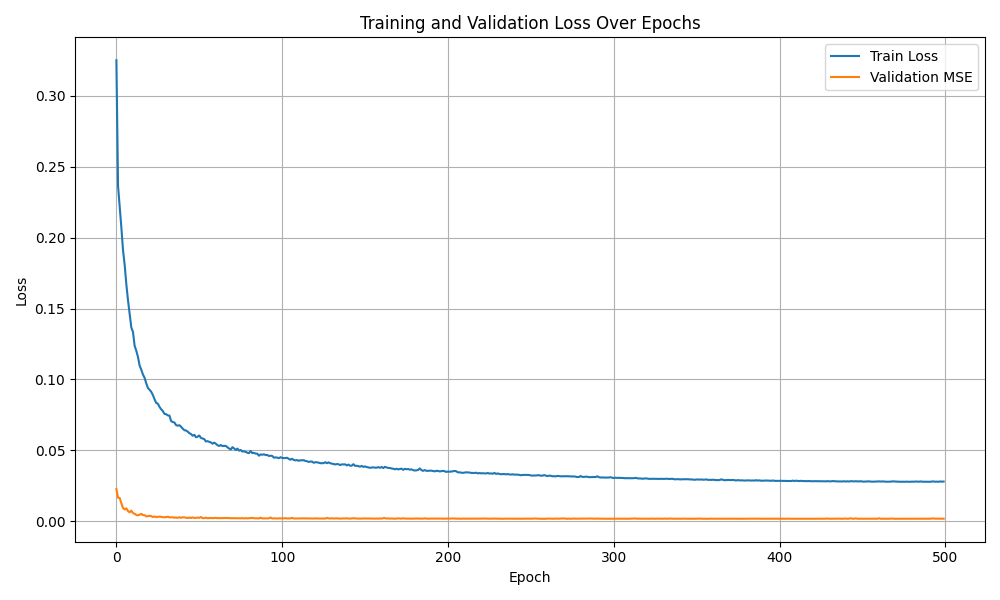

The learning rate is set at 1e-3 which gives the steady decrease in loss as you can see in the above plot, able to converge quickly whilst remaining stable. The batch size of 8 also helps support the stable training and convergence and also helps the model to generalise better by introducing noise. The dropout value of 0.5 is also crucial for generalisation, the success of which can be seen by the small margin between training and validation losses. The smooth decay of training loss also highlights effective parameters from the CosineAnnealingLR Scheduler. 500 epochs gives the model enough time to converge (training loss curve flatenning ~400 epochs), but not an excess of time that could introduce overfitting.

In [ ]:
import os
import torch
import torch.nn as nn
import numpy as np
import random
from torch.utils.data import DataLoader, random_split, Dataset
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchvision import transforms
from PIL import Image
from pytorch_msssim import SSIM
import matplotlib.pyplot as plt

# Seeding to prevent randomness during runs
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Hyperparams
DATA_DIR       = 'face_images'
EPOCHS         = 500
BATCH_SIZE     = 8
LR             = 1e-3
VAL_SPLIT      = 0.01
DEVICE         = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CHANNELS       = 1
HYBRID_ALPHA   = 0.4
LATENT_DIM     = 32
KERNEL_SIZE    = 11
PADDING        = KERNEL_SIZE // 2
OUTPUT_PADDING = 1

class Encoder(nn.Module):
    def __init__(self, latent_dim=LATENT_DIM):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(CHANNELS, 16, KERNEL_SIZE, stride=1, padding=PADDING),
            nn.BatchNorm2d(16),
            nn.Mish(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, KERNEL_SIZE, stride=1, padding=PADDING),
            nn.BatchNorm2d(32),
            nn.Mish(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, KERNEL_SIZE, stride=1, padding=PADDING),
            nn.BatchNorm2d(64),
            nn.Mish(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, KERNEL_SIZE, stride=1, padding=PADDING),
            nn.BatchNorm2d(128),
            nn.Mish(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.5),
            nn.Flatten()
        )
        self.fc = nn.Linear(128 * 12 * 10, latent_dim)

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim=LATENT_DIM):
        super().__init__()
        self.fc = nn.Linear(latent_dim, 128 * 12 * 10)
        self.deconv = nn.Sequential(
            nn.Unflatten(1, (128, 12, 10)),
            nn.Mish(),
            nn.ConvTranspose2d(128, 64, KERNEL_SIZE, stride=2, padding=PADDING, output_padding=OUTPUT_PADDING),
            nn.BatchNorm2d(64),
            nn.Mish(),
            nn.ConvTranspose2d(64, 32, KERNEL_SIZE, stride=2, padding=PADDING, output_padding=OUTPUT_PADDING),
            nn.BatchNorm2d(32),
            nn.Mish(),
            nn.ConvTranspose2d(32, 16, KERNEL_SIZE, stride=2, padding=PADDING, output_padding=OUTPUT_PADDING),
            nn.BatchNorm2d(16),
            nn.Mish(),
            nn.ConvTranspose2d(16, CHANNELS, KERNEL_SIZE, stride=2, padding=PADDING, output_padding=OUTPUT_PADDING),
            nn.Sigmoid()
        )

    def forward(self, z):
        x = self.fc(z)
        return self.deconv(x)

# Get the images and augmentation
class FacesDataset(Dataset):
    def __init__(self, root_dir: str):
        self.files = [os.path.join(root_dir, fn)
                      for fn in os.listdir(root_dir)
                      if fn.lower().endswith(('.jpg'))]
        self.transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=CHANNELS),
            transforms.Resize((192, 160)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img = Image.open(self.files[idx]).convert('L')
        return self.transform(img)

def train(data_dir, epochs, batch_size, lr, val_split, device):
    ds = FacesDataset(data_dir)
    val_size = int(len(ds) * val_split)
    train_size = len(ds) - val_size

    generator = torch.Generator().manual_seed(SEED)
    train_ds, val_ds = random_split(ds, [train_size, val_size], generator=generator)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=4)

    encoder = Encoder(latent_dim=LATENT_DIM).to(device)
    decoder = Decoder(latent_dim=LATENT_DIM).to(device)
    mse_loss_fn = nn.MSELoss()
    ssim_fn = SSIM(data_range=1.0, size_average=True, channel=CHANNELS).to(device)
    optimizer = torch.optim.AdamW(list(encoder.parameters()) + list(decoder.parameters()), lr=lr, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    best_val_ssim = -1.0
    train_loss_log = []
    val_mse_log = []

    for epoch in range(1, epochs+1):
        encoder.train(); decoder.train()
        total_train_loss = 0.0
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            z = encoder(batch)
            recon = decoder(z)
            mse = mse_loss_fn(recon, batch)
            ssim_loss = 1.0 - ssim_fn(recon, batch)
            loss = HYBRID_ALPHA * mse + (1 - HYBRID_ALPHA) * ssim_loss
            loss.backward()
            torch.nn.utils.clip_grad_norm_(list(encoder.parameters()) + list(decoder.parameters()), max_norm=2.0)
            optimizer.step()
            total_train_loss += loss.item() * batch.size(0)

        avg_train_loss = total_train_loss / len(train_loader.dataset)

        encoder.eval(); decoder.eval()
        total_val_mse = 0.0
        total_val_ssim = 0.0
        with torch.no_grad():
            for batch in val_loader:
                batch = batch.to(device)
                z = encoder(batch)
                recon = decoder(z)
                total_val_mse += mse_loss_fn(recon, batch).item() * batch.size(0)
                total_val_ssim += ssim_fn(recon, batch).item() * batch.size(0)

        avg_val_mse = total_val_mse / len(val_loader.dataset)
        avg_val_ssim = total_val_ssim / len(val_loader.dataset)

        train_loss_log.append(avg_train_loss)
        val_mse_log.append(avg_val_mse)

        print(f"Epoch {epoch:03d}: Train Loss: {avg_train_loss:.6f} | Val MSE: {avg_val_mse:.6f} | Val SSIM: {avg_val_ssim:.4f}")

        if avg_val_ssim > best_val_ssim:
            best_val_ssim = avg_val_ssim
            torch.save(encoder.state_dict(), 'encoder.pth')
            torch.save(decoder.state_dict(), 'decoder.pth')
            print(f"  * Saved best model (SSIM {avg_val_ssim:.4f})")

        scheduler.step()

    print('Training complete. Best Val SSIM:', best_val_ssim)

if __name__ == '__main__':
    train(DATA_DIR, EPOCHS, BATCH_SIZE, LR, VAL_SPLIT, DEVICE)

Epoch 001: Train Loss: 0.324068 | Val MSE: 0.019573 | Val SSIM: 0.6362


  * Saved best model (SSIM 0.6362)


Epoch 002: Train Loss: 0.247538 | Val MSE: 0.017769 | Val SSIM: 0.6548
  * Saved best model (SSIM 0.6548)


Epoch 003: Train Loss: 0.235325 | Val MSE: 0.014520 | Val SSIM: 0.6699
  * Saved best model (SSIM 0.6699)


Epoch 004: Train Loss: 0.220535 | Val MSE: 0.015222 | Val SSIM: 0.6636


Epoch 005: Train Loss: 0.205140 | Val MSE: 0.011562 | Val SSIM: 0.7084
  * Saved best model (SSIM 0.7084)


Epoch 006: Train Loss: 0.191641 | Val MSE: 0.012625 | Val SSIM: 0.7324
  * Saved best model (SSIM 0.7324)


Epoch 007: Train Loss: 0.178102 | Val MSE: 0.010805 | Val SSIM: 0.6599


Epoch 008: Train Loss: 0.166014 | Val MSE: 0.007592 | Val SSIM: 0.7647
  * Saved best model (SSIM 0.7647)


Epoch 009: Train Loss: 0.154247 | Val MSE: 0.007445 | Val SSIM: 0.7554


Epoch 010: Train Loss: 0.148928 | Val MSE: 0.006950 | Val SSIM: 0.7859
  * Saved best model (SSIM 0.7859)


Epoch 011: Train Loss: 0.139629 | Val MSE: 0.005723 | Val SSIM: 0.7918
  * Saved best model (SSIM 0.7918)


Epoch 012: Train Loss: 0.134023 | Val MSE: 0.005563 | Val SSIM: 0.7921
  * Saved best model (SSIM 0.7921)


Epoch 013: Train Loss: 0.128876 | Val MSE: 0.004610 | Val SSIM: 0.8109
  * Saved best model (SSIM 0.8109)


Epoch 014: Train Loss: 0.123529 | Val MSE: 0.004891 | Val SSIM: 0.8140
  * Saved best model (SSIM 0.8140)


Epoch 015: Train Loss: 0.118430 | Val MSE: 0.004357 | Val SSIM: 0.8123


Epoch 016: Train Loss: 0.115107 | Val MSE: 0.004834 | Val SSIM: 0.7840


Epoch 017: Train Loss: 0.110894 | Val MSE: 0.004224 | Val SSIM: 0.7708


Epoch 018: Train Loss: 0.107751 | Val MSE: 0.003562 | Val SSIM: 0.8318
  * Saved best model (SSIM 0.8318)


Epoch 019: Train Loss: 0.103797 | Val MSE: 0.004214 | Val SSIM: 0.8399
  * Saved best model (SSIM 0.8399)


Epoch 020: Train Loss: 0.102052 | Val MSE: 0.003666 | Val SSIM: 0.8250


Epoch 021: Train Loss: 0.097960 | Val MSE: 0.003594 | Val SSIM: 0.8456
  * Saved best model (SSIM 0.8456)


Epoch 022: Train Loss: 0.096907 | Val MSE: 0.003663 | Val SSIM: 0.8487
  * Saved best model (SSIM 0.8487)


Epoch 023: Train Loss: 0.092937 | Val MSE: 0.003837 | Val SSIM: 0.8476


Epoch 024: Train Loss: 0.091758 | Val MSE: 0.003296 | Val SSIM: 0.8539
  * Saved best model (SSIM 0.8539)


Epoch 025: Train Loss: 0.090158 | Val MSE: 0.003127 | Val SSIM: 0.8507


Epoch 026: Train Loss: 0.088328 | Val MSE: 0.002908 | Val SSIM: 0.8620
  * Saved best model (SSIM 0.8620)


Epoch 027: Train Loss: 0.085891 | Val MSE: 0.003276 | Val SSIM: 0.8612


Epoch 028: Train Loss: 0.083241 | Val MSE: 0.003445 | Val SSIM: 0.8607


Epoch 029: Train Loss: 0.083317 | Val MSE: 0.003056 | Val SSIM: 0.8635
  * Saved best model (SSIM 0.8635)


Epoch 030: Train Loss: 0.081476 | Val MSE: 0.003693 | Val SSIM: 0.8500


Epoch 031: Train Loss: 0.078866 | Val MSE: 0.003295 | Val SSIM: 0.8671
  * Saved best model (SSIM 0.8671)


Epoch 032: Train Loss: 0.077897 | Val MSE: 0.003119 | Val SSIM: 0.8701
  * Saved best model (SSIM 0.8701)


Epoch 033: Train Loss: 0.078618 | Val MSE: 0.002762 | Val SSIM: 0.8722
  * Saved best model (SSIM 0.8722)


Epoch 034: Train Loss: 0.075751 | Val MSE: 0.002751 | Val SSIM: 0.8703


Epoch 035: Train Loss: 0.076100 | Val MSE: 0.003033 | Val SSIM: 0.8654


Epoch 036: Train Loss: 0.073495 | Val MSE: 0.003042 | Val SSIM: 0.8744
  * Saved best model (SSIM 0.8744)


Epoch 037: Train Loss: 0.071756 | Val MSE: 0.002663 | Val SSIM: 0.8740


Epoch 038: Train Loss: 0.069897 | Val MSE: 0.002655 | Val SSIM: 0.8786
  * Saved best model (SSIM 0.8786)


Epoch 039: Train Loss: 0.071531 | Val MSE: 0.002670 | Val SSIM: 0.8732


Epoch 040: Train Loss: 0.070219 | Val MSE: 0.002646 | Val SSIM: 0.8801
  * Saved best model (SSIM 0.8801)


Epoch 041: Train Loss: 0.068639 | Val MSE: 0.002547 | Val SSIM: 0.8769


Epoch 042: Train Loss: 0.068129 | Val MSE: 0.002869 | Val SSIM: 0.8774


Epoch 043: Train Loss: 0.067012 | Val MSE: 0.002544 | Val SSIM: 0.8806
  * Saved best model (SSIM 0.8806)


Epoch 044: Train Loss: 0.065318 | Val MSE: 0.002837 | Val SSIM: 0.8791


Epoch 045: Train Loss: 0.064721 | Val MSE: 0.002507 | Val SSIM: 0.8821
  * Saved best model (SSIM 0.8821)


Epoch 046: Train Loss: 0.064683 | Val MSE: 0.002708 | Val SSIM: 0.8793


Epoch 047: Train Loss: 0.064277 | Val MSE: 0.002496 | Val SSIM: 0.8831
  * Saved best model (SSIM 0.8831)


Epoch 048: Train Loss: 0.062631 | Val MSE: 0.002580 | Val SSIM: 0.8818


Epoch 049: Train Loss: 0.062039 | Val MSE: 0.002593 | Val SSIM: 0.8817


Epoch 050: Train Loss: 0.062306 | Val MSE: 0.002556 | Val SSIM: 0.8818


Epoch 051: Train Loss: 0.061798 | Val MSE: 0.002526 | Val SSIM: 0.8847
  * Saved best model (SSIM 0.8847)


Epoch 052: Train Loss: 0.059796 | Val MSE: 0.002397 | Val SSIM: 0.8857
  * Saved best model (SSIM 0.8857)


Epoch 053: Train Loss: 0.059554 | Val MSE: 0.003291 | Val SSIM: 0.8803


Epoch 054: Train Loss: 0.059057 | Val MSE: 0.002812 | Val SSIM: 0.8869
  * Saved best model (SSIM 0.8869)


Epoch 055: Train Loss: 0.059002 | Val MSE: 0.002378 | Val SSIM: 0.8880
  * Saved best model (SSIM 0.8880)


Epoch 056: Train Loss: 0.058546 | Val MSE: 0.002326 | Val SSIM: 0.8853


Epoch 057: Train Loss: 0.057272 | Val MSE: 0.002503 | Val SSIM: 0.8848


Epoch 058: Train Loss: 0.057530 | Val MSE: 0.002375 | Val SSIM: 0.8886
  * Saved best model (SSIM 0.8886)


Epoch 059: Train Loss: 0.057344 | Val MSE: 0.002400 | Val SSIM: 0.8899
  * Saved best model (SSIM 0.8899)


Epoch 060: Train Loss: 0.056504 | Val MSE: 0.002506 | Val SSIM: 0.8862


Epoch 061: Train Loss: 0.056128 | Val MSE: 0.002353 | Val SSIM: 0.8888


Epoch 062: Train Loss: 0.056325 | Val MSE: 0.002784 | Val SSIM: 0.8872


Epoch 063: Train Loss: 0.055772 | Val MSE: 0.002281 | Val SSIM: 0.8887


Epoch 064: Train Loss: 0.055043 | Val MSE: 0.002347 | Val SSIM: 0.8890


Epoch 065: Train Loss: 0.055040 | Val MSE: 0.002335 | Val SSIM: 0.8889


Epoch 066: Train Loss: 0.054413 | Val MSE: 0.002561 | Val SSIM: 0.8918
  * Saved best model (SSIM 0.8918)


Epoch 067: Train Loss: 0.053673 | Val MSE: 0.002315 | Val SSIM: 0.8936
  * Saved best model (SSIM 0.8936)


Epoch 068: Train Loss: 0.053389 | Val MSE: 0.002455 | Val SSIM: 0.8893


Epoch 069: Train Loss: 0.053263 | Val MSE: 0.002340 | Val SSIM: 0.8926


Epoch 070: Train Loss: 0.052673 | Val MSE: 0.002359 | Val SSIM: 0.8911


Epoch 071: Train Loss: 0.053500 | Val MSE: 0.002376 | Val SSIM: 0.8905


Epoch 072: Train Loss: 0.052182 | Val MSE: 0.002205 | Val SSIM: 0.8937
  * Saved best model (SSIM 0.8937)


Epoch 073: Train Loss: 0.051525 | Val MSE: 0.002350 | Val SSIM: 0.8908


Epoch 074: Train Loss: 0.052073 | Val MSE: 0.002361 | Val SSIM: 0.8903


Epoch 075: Train Loss: 0.050841 | Val MSE: 0.002174 | Val SSIM: 0.8922


Epoch 076: Train Loss: 0.051016 | Val MSE: 0.002574 | Val SSIM: 0.8942
  * Saved best model (SSIM 0.8942)


Epoch 077: Train Loss: 0.050893 | Val MSE: 0.002371 | Val SSIM: 0.8916


Epoch 078: Train Loss: 0.050419 | Val MSE: 0.002548 | Val SSIM: 0.8934


Epoch 079: Train Loss: 0.050143 | Val MSE: 0.002210 | Val SSIM: 0.8943
  * Saved best model (SSIM 0.8943)


Epoch 080: Train Loss: 0.049152 | Val MSE: 0.002287 | Val SSIM: 0.8940


Epoch 081: Train Loss: 0.050905 | Val MSE: 0.002310 | Val SSIM: 0.8924


Epoch 082: Train Loss: 0.049620 | Val MSE: 0.002373 | Val SSIM: 0.8942


Epoch 083: Train Loss: 0.049083 | Val MSE: 0.002434 | Val SSIM: 0.8937


Epoch 084: Train Loss: 0.048729 | Val MSE: 0.002145 | Val SSIM: 0.8949
  * Saved best model (SSIM 0.8949)


Epoch 085: Train Loss: 0.048448 | Val MSE: 0.002104 | Val SSIM: 0.8943


Epoch 086: Train Loss: 0.048789 | Val MSE: 0.002178 | Val SSIM: 0.8931


Epoch 087: Train Loss: 0.048351 | Val MSE: 0.002129 | Val SSIM: 0.8966
  * Saved best model (SSIM 0.8966)


Epoch 088: Train Loss: 0.047572 | Val MSE: 0.002235 | Val SSIM: 0.8979
  * Saved best model (SSIM 0.8979)


Epoch 089: Train Loss: 0.047379 | Val MSE: 0.002137 | Val SSIM: 0.8957


Epoch 090: Train Loss: 0.047660 | Val MSE: 0.002188 | Val SSIM: 0.8937


Epoch 091: Train Loss: 0.047616 | Val MSE: 0.002143 | Val SSIM: 0.8956


Epoch 092: Train Loss: 0.046676 | Val MSE: 0.002091 | Val SSIM: 0.8968


Epoch 093: Train Loss: 0.047048 | Val MSE: 0.002169 | Val SSIM: 0.8960


Epoch 094: Train Loss: 0.046984 | Val MSE: 0.002102 | Val SSIM: 0.8977


Epoch 095: Train Loss: 0.046905 | Val MSE: 0.002104 | Val SSIM: 0.8943


Epoch 096: Train Loss: 0.045912 | Val MSE: 0.002226 | Val SSIM: 0.8959


Epoch 097: Train Loss: 0.046119 | Val MSE: 0.002181 | Val SSIM: 0.8950


Epoch 098: Train Loss: 0.045821 | Val MSE: 0.002133 | Val SSIM: 0.8958


Epoch 099: Train Loss: 0.046280 | Val MSE: 0.002257 | Val SSIM: 0.8964


Epoch 100: Train Loss: 0.045123 | Val MSE: 0.002097 | Val SSIM: 0.8978


Epoch 101: Train Loss: 0.046028 | Val MSE: 0.002108 | Val SSIM: 0.8978


Epoch 102: Train Loss: 0.046678 | Val MSE: 0.002173 | Val SSIM: 0.8962


Epoch 103: Train Loss: 0.044628 | Val MSE: 0.002009 | Val SSIM: 0.8984
  * Saved best model (SSIM 0.8984)


Epoch 104: Train Loss: 0.044869 | Val MSE: 0.002225 | Val SSIM: 0.8972


Epoch 105: Train Loss: 0.044532 | Val MSE: 0.002095 | Val SSIM: 0.8984


Epoch 106: Train Loss: 0.044565 | Val MSE: 0.002263 | Val SSIM: 0.8956


Epoch 107: Train Loss: 0.044274 | Val MSE: 0.002156 | Val SSIM: 0.8977


Epoch 108: Train Loss: 0.044311 | Val MSE: 0.002152 | Val SSIM: 0.8980


Epoch 109: Train Loss: 0.045179 | Val MSE: 0.002218 | Val SSIM: 0.8954


Epoch 110: Train Loss: 0.043857 | Val MSE: 0.002081 | Val SSIM: 0.8956


Epoch 111: Train Loss: 0.043647 | Val MSE: 0.002053 | Val SSIM: 0.8977


Epoch 112: Train Loss: 0.043069 | Val MSE: 0.001946 | Val SSIM: 0.8997
  * Saved best model (SSIM 0.8997)


Epoch 113: Train Loss: 0.043468 | Val MSE: 0.002140 | Val SSIM: 0.8983


Epoch 114: Train Loss: 0.043954 | Val MSE: 0.002224 | Val SSIM: 0.8980


Epoch 115: Train Loss: 0.042972 | Val MSE: 0.002188 | Val SSIM: 0.8985


Epoch 116: Train Loss: 0.042977 | Val MSE: 0.002103 | Val SSIM: 0.9008
  * Saved best model (SSIM 0.9008)


Epoch 117: Train Loss: 0.042580 | Val MSE: 0.002077 | Val SSIM: 0.8991


Epoch 118: Train Loss: 0.042656 | Val MSE: 0.001958 | Val SSIM: 0.9002


Epoch 119: Train Loss: 0.042909 | Val MSE: 0.002221 | Val SSIM: 0.8991


Epoch 120: Train Loss: 0.042323 | Val MSE: 0.002096 | Val SSIM: 0.8992


Epoch 121: Train Loss: 0.042654 | Val MSE: 0.002070 | Val SSIM: 0.8998


Epoch 122: Train Loss: 0.042393 | Val MSE: 0.002017 | Val SSIM: 0.9003


Epoch 123: Train Loss: 0.042452 | Val MSE: 0.002153 | Val SSIM: 0.8988


Epoch 124: Train Loss: 0.041740 | Val MSE: 0.002208 | Val SSIM: 0.8993


Epoch 125: Train Loss: 0.043025 | Val MSE: 0.002159 | Val SSIM: 0.8993


Epoch 126: Train Loss: 0.041896 | Val MSE: 0.002128 | Val SSIM: 0.8980


Epoch 127: Train Loss: 0.041511 | Val MSE: 0.002036 | Val SSIM: 0.8991


Epoch 128: Train Loss: 0.041157 | Val MSE: 0.002198 | Val SSIM: 0.8995


Epoch 129: Train Loss: 0.040988 | Val MSE: 0.002193 | Val SSIM: 0.8986


Epoch 130: Train Loss: 0.041224 | Val MSE: 0.002160 | Val SSIM: 0.9003


Epoch 131: Train Loss: 0.040980 | Val MSE: 0.002353 | Val SSIM: 0.8995


Epoch 132: Train Loss: 0.041144 | Val MSE: 0.002092 | Val SSIM: 0.8981


Epoch 133: Train Loss: 0.041343 | Val MSE: 0.002463 | Val SSIM: 0.9001


Epoch 134: Train Loss: 0.040959 | Val MSE: 0.001986 | Val SSIM: 0.8985


Epoch 135: Train Loss: 0.041322 | Val MSE: 0.002204 | Val SSIM: 0.8984


Epoch 136: Train Loss: 0.040520 | Val MSE: 0.002084 | Val SSIM: 0.8974


Epoch 137: Train Loss: 0.040600 | Val MSE: 0.002133 | Val SSIM: 0.8985


Epoch 138: Train Loss: 0.040017 | Val MSE: 0.002003 | Val SSIM: 0.9001


Epoch 139: Train Loss: 0.039857 | Val MSE: 0.002080 | Val SSIM: 0.9007


Epoch 140: Train Loss: 0.040391 | Val MSE: 0.002175 | Val SSIM: 0.8992


Epoch 141: Train Loss: 0.040218 | Val MSE: 0.002036 | Val SSIM: 0.8998


Epoch 142: Train Loss: 0.039555 | Val MSE: 0.002034 | Val SSIM: 0.9012
  * Saved best model (SSIM 0.9012)


Epoch 143: Train Loss: 0.039697 | Val MSE: 0.002124 | Val SSIM: 0.8969


Epoch 144: Train Loss: 0.039327 | Val MSE: 0.001947 | Val SSIM: 0.9013
  * Saved best model (SSIM 0.9013)


Epoch 145: Train Loss: 0.039355 | Val MSE: 0.002033 | Val SSIM: 0.9014
  * Saved best model (SSIM 0.9014)


Epoch 146: Train Loss: 0.039928 | Val MSE: 0.002015 | Val SSIM: 0.9015
  * Saved best model (SSIM 0.9015)


Epoch 147: Train Loss: 0.039266 | Val MSE: 0.002086 | Val SSIM: 0.8997


Epoch 148: Train Loss: 0.039371 | Val MSE: 0.002509 | Val SSIM: 0.8993


Epoch 149: Train Loss: 0.039610 | Val MSE: 0.002200 | Val SSIM: 0.9003


Epoch 150: Train Loss: 0.039004 | Val MSE: 0.002239 | Val SSIM: 0.8981


Epoch 151: Train Loss: 0.038773 | Val MSE: 0.002093 | Val SSIM: 0.9019
  * Saved best model (SSIM 0.9019)


Epoch 152: Train Loss: 0.039311 | Val MSE: 0.002122 | Val SSIM: 0.8996


Epoch 153: Train Loss: 0.038773 | Val MSE: 0.002119 | Val SSIM: 0.9014


Epoch 154: Train Loss: 0.039032 | Val MSE: 0.002169 | Val SSIM: 0.8980


Epoch 155: Train Loss: 0.038857 | Val MSE: 0.002284 | Val SSIM: 0.9005


Epoch 156: Train Loss: 0.039218 | Val MSE: 0.002111 | Val SSIM: 0.9022
  * Saved best model (SSIM 0.9022)


Epoch 157: Train Loss: 0.038294 | Val MSE: 0.002219 | Val SSIM: 0.9010


Epoch 158: Train Loss: 0.038615 | Val MSE: 0.002166 | Val SSIM: 0.9016


Epoch 159: Train Loss: 0.038013 | Val MSE: 0.002030 | Val SSIM: 0.9017


Epoch 160: Train Loss: 0.038197 | Val MSE: 0.002132 | Val SSIM: 0.9007


Epoch 161: Train Loss: 0.038071 | Val MSE: 0.002102 | Val SSIM: 0.9020


Epoch 162: Train Loss: 0.038180 | Val MSE: 0.002215 | Val SSIM: 0.9013


Epoch 163: Train Loss: 0.038192 | Val MSE: 0.002033 | Val SSIM: 0.9017


Epoch 164: Train Loss: 0.037944 | Val MSE: 0.001993 | Val SSIM: 0.9026
  * Saved best model (SSIM 0.9026)


Epoch 165: Train Loss: 0.037841 | Val MSE: 0.002254 | Val SSIM: 0.9019


Epoch 166: Train Loss: 0.037648 | Val MSE: 0.002073 | Val SSIM: 0.9021


Epoch 167: Train Loss: 0.037614 | Val MSE: 0.002011 | Val SSIM: 0.9013


Epoch 168: Train Loss: 0.037615 | Val MSE: 0.002060 | Val SSIM: 0.9027
  * Saved best model (SSIM 0.9027)


Epoch 169: Train Loss: 0.037454 | Val MSE: 0.002096 | Val SSIM: 0.9012


Epoch 170: Train Loss: 0.037873 | Val MSE: 0.002170 | Val SSIM: 0.8955


Epoch 171: Train Loss: 0.037241 | Val MSE: 0.002043 | Val SSIM: 0.9010


Epoch 172: Train Loss: 0.037236 | Val MSE: 0.002083 | Val SSIM: 0.9011


Epoch 173: Train Loss: 0.036987 | Val MSE: 0.001992 | Val SSIM: 0.9017


Epoch 174: Train Loss: 0.037356 | Val MSE: 0.001997 | Val SSIM: 0.9020


Epoch 175: Train Loss: 0.036915 | Val MSE: 0.002054 | Val SSIM: 0.9029
  * Saved best model (SSIM 0.9029)


Epoch 176: Train Loss: 0.036857 | Val MSE: 0.002081 | Val SSIM: 0.9023


Epoch 177: Train Loss: 0.036900 | Val MSE: 0.002006 | Val SSIM: 0.9028


Epoch 178: Train Loss: 0.036994 | Val MSE: 0.002097 | Val SSIM: 0.9021


Epoch 179: Train Loss: 0.037070 | Val MSE: 0.001986 | Val SSIM: 0.9022


Epoch 180: Train Loss: 0.037333 | Val MSE: 0.002142 | Val SSIM: 0.9026


Epoch 181: Train Loss: 0.036484 | Val MSE: 0.002028 | Val SSIM: 0.9025


Epoch 182: Train Loss: 0.036145 | Val MSE: 0.002064 | Val SSIM: 0.9027


Epoch 183: Train Loss: 0.036863 | Val MSE: 0.002027 | Val SSIM: 0.9020


Epoch 184: Train Loss: 0.036526 | Val MSE: 0.001982 | Val SSIM: 0.9031
  * Saved best model (SSIM 0.9031)


Epoch 185: Train Loss: 0.036335 | Val MSE: 0.002024 | Val SSIM: 0.9026


Epoch 186: Train Loss: 0.036345 | Val MSE: 0.002145 | Val SSIM: 0.9022


Epoch 187: Train Loss: 0.036260 | Val MSE: 0.002143 | Val SSIM: 0.9006


Epoch 188: Train Loss: 0.036391 | Val MSE: 0.002168 | Val SSIM: 0.9026


Epoch 189: Train Loss: 0.036045 | Val MSE: 0.002237 | Val SSIM: 0.9022


Epoch 190: Train Loss: 0.036184 | Val MSE: 0.002005 | Val SSIM: 0.9029


Epoch 191: Train Loss: 0.035628 | Val MSE: 0.002101 | Val SSIM: 0.9015


Epoch 192: Train Loss: 0.035852 | Val MSE: 0.002051 | Val SSIM: 0.9009


Epoch 193: Train Loss: 0.035842 | Val MSE: 0.001979 | Val SSIM: 0.9040
  * Saved best model (SSIM 0.9040)


Epoch 194: Train Loss: 0.035557 | Val MSE: 0.002051 | Val SSIM: 0.9021


Epoch 195: Train Loss: 0.035596 | Val MSE: 0.002000 | Val SSIM: 0.9041
  * Saved best model (SSIM 0.9041)


Epoch 196: Train Loss: 0.035845 | Val MSE: 0.002018 | Val SSIM: 0.9025


Epoch 197: Train Loss: 0.035829 | Val MSE: 0.002036 | Val SSIM: 0.9031


Epoch 198: Train Loss: 0.035895 | Val MSE: 0.002069 | Val SSIM: 0.9032


Epoch 199: Train Loss: 0.035344 | Val MSE: 0.002047 | Val SSIM: 0.9029


Epoch 200: Train Loss: 0.035512 | Val MSE: 0.002274 | Val SSIM: 0.9017


Epoch 201: Train Loss: 0.035449 | Val MSE: 0.001976 | Val SSIM: 0.9033


Epoch 202: Train Loss: 0.035703 | Val MSE: 0.002173 | Val SSIM: 0.9010


Epoch 203: Train Loss: 0.036072 | Val MSE: 0.001945 | Val SSIM: 0.9018


Epoch 204: Train Loss: 0.034897 | Val MSE: 0.002044 | Val SSIM: 0.9037


Epoch 205: Train Loss: 0.034858 | Val MSE: 0.001960 | Val SSIM: 0.9034


Epoch 206: Train Loss: 0.035039 | Val MSE: 0.002028 | Val SSIM: 0.9031


Epoch 207: Train Loss: 0.034792 | Val MSE: 0.001957 | Val SSIM: 0.9038


Epoch 208: Train Loss: 0.034811 | Val MSE: 0.001955 | Val SSIM: 0.9033


Epoch 209: Train Loss: 0.035128 | Val MSE: 0.002137 | Val SSIM: 0.9029


Epoch 210: Train Loss: 0.034737 | Val MSE: 0.001960 | Val SSIM: 0.9037


Epoch 211: Train Loss: 0.034891 | Val MSE: 0.001983 | Val SSIM: 0.9039


Epoch 212: Train Loss: 0.034794 | Val MSE: 0.001953 | Val SSIM: 0.9039


Epoch 213: Train Loss: 0.034465 | Val MSE: 0.001968 | Val SSIM: 0.9044
  * Saved best model (SSIM 0.9044)


Epoch 214: Train Loss: 0.034762 | Val MSE: 0.001983 | Val SSIM: 0.9037


Epoch 215: Train Loss: 0.034655 | Val MSE: 0.002004 | Val SSIM: 0.9004


Epoch 216: Train Loss: 0.034258 | Val MSE: 0.001932 | Val SSIM: 0.9035


Epoch 217: Train Loss: 0.034435 | Val MSE: 0.002017 | Val SSIM: 0.9034


Epoch 218: Train Loss: 0.034480 | Val MSE: 0.002032 | Val SSIM: 0.9032


Epoch 219: Train Loss: 0.034464 | Val MSE: 0.001965 | Val SSIM: 0.9034


Epoch 220: Train Loss: 0.034321 | Val MSE: 0.001953 | Val SSIM: 0.9043


Epoch 221: Train Loss: 0.034323 | Val MSE: 0.001966 | Val SSIM: 0.9038


Epoch 222: Train Loss: 0.034062 | Val MSE: 0.001992 | Val SSIM: 0.9039


Epoch 223: Train Loss: 0.034109 | Val MSE: 0.002049 | Val SSIM: 0.9042


Epoch 224: Train Loss: 0.034118 | Val MSE: 0.001976 | Val SSIM: 0.9044


Epoch 225: Train Loss: 0.033904 | Val MSE: 0.002084 | Val SSIM: 0.9034


Epoch 226: Train Loss: 0.034166 | Val MSE: 0.002039 | Val SSIM: 0.9034


Epoch 227: Train Loss: 0.033770 | Val MSE: 0.002187 | Val SSIM: 0.9030


Epoch 228: Train Loss: 0.033745 | Val MSE: 0.001987 | Val SSIM: 0.9035


Epoch 229: Train Loss: 0.033803 | Val MSE: 0.001966 | Val SSIM: 0.9032


Epoch 230: Train Loss: 0.033776 | Val MSE: 0.001987 | Val SSIM: 0.9033


Epoch 231: Train Loss: 0.033894 | Val MSE: 0.001942 | Val SSIM: 0.9047
  * Saved best model (SSIM 0.9047)


Epoch 232: Train Loss: 0.033655 | Val MSE: 0.002008 | Val SSIM: 0.9040


Epoch 233: Train Loss: 0.033475 | Val MSE: 0.002027 | Val SSIM: 0.9045


Epoch 234: Train Loss: 0.033430 | Val MSE: 0.001930 | Val SSIM: 0.9043


Epoch 235: Train Loss: 0.033524 | Val MSE: 0.001913 | Val SSIM: 0.9030


Epoch 236: Train Loss: 0.033276 | Val MSE: 0.001996 | Val SSIM: 0.9043


Epoch 237: Train Loss: 0.033298 | Val MSE: 0.002005 | Val SSIM: 0.9032


Epoch 238: Train Loss: 0.033240 | Val MSE: 0.002159 | Val SSIM: 0.9032


Epoch 239: Train Loss: 0.033143 | Val MSE: 0.001947 | Val SSIM: 0.9038


Epoch 240: Train Loss: 0.033117 | Val MSE: 0.002001 | Val SSIM: 0.9030


Epoch 241: Train Loss: 0.033136 | Val MSE: 0.002034 | Val SSIM: 0.9025


Epoch 242: Train Loss: 0.033403 | Val MSE: 0.002032 | Val SSIM: 0.9035


Epoch 243: Train Loss: 0.033216 | Val MSE: 0.001943 | Val SSIM: 0.9043


Epoch 244: Train Loss: 0.033055 | Val MSE: 0.001858 | Val SSIM: 0.9046


Epoch 245: Train Loss: 0.033265 | Val MSE: 0.001953 | Val SSIM: 0.9048
  * Saved best model (SSIM 0.9048)


Epoch 246: Train Loss: 0.033522 | Val MSE: 0.001935 | Val SSIM: 0.9043


Epoch 247: Train Loss: 0.032864 | Val MSE: 0.001902 | Val SSIM: 0.9048
  * Saved best model (SSIM 0.9048)


Epoch 248: Train Loss: 0.033012 | Val MSE: 0.002070 | Val SSIM: 0.9043


Epoch 249: Train Loss: 0.032674 | Val MSE: 0.002006 | Val SSIM: 0.9047


Epoch 250: Train Loss: 0.032650 | Val MSE: 0.002015 | Val SSIM: 0.9047


Epoch 251: Train Loss: 0.032791 | Val MSE: 0.001961 | Val SSIM: 0.9050
  * Saved best model (SSIM 0.9050)


Epoch 252: Train Loss: 0.032784 | Val MSE: 0.001973 | Val SSIM: 0.9043


Epoch 253: Train Loss: 0.032823 | Val MSE: 0.002011 | Val SSIM: 0.9028


Epoch 254: Train Loss: 0.032763 | Val MSE: 0.001951 | Val SSIM: 0.9049


Epoch 255: Train Loss: 0.032359 | Val MSE: 0.001958 | Val SSIM: 0.9044


Epoch 256: Train Loss: 0.032419 | Val MSE: 0.001944 | Val SSIM: 0.9053
  * Saved best model (SSIM 0.9053)


Epoch 257: Train Loss: 0.032544 | Val MSE: 0.001952 | Val SSIM: 0.9048


Epoch 258: Train Loss: 0.032434 | Val MSE: 0.001915 | Val SSIM: 0.9044


Epoch 259: Train Loss: 0.032726 | Val MSE: 0.001906 | Val SSIM: 0.9046


Epoch 260: Train Loss: 0.032823 | Val MSE: 0.001993 | Val SSIM: 0.9036


Epoch 261: Train Loss: 0.032432 | Val MSE: 0.001955 | Val SSIM: 0.9049


Epoch 262: Train Loss: 0.032239 | Val MSE: 0.001943 | Val SSIM: 0.9045


Epoch 263: Train Loss: 0.032154 | Val MSE: 0.001997 | Val SSIM: 0.9042


Epoch 264: Train Loss: 0.031998 | Val MSE: 0.001935 | Val SSIM: 0.9045


Epoch 265: Train Loss: 0.032176 | Val MSE: 0.001936 | Val SSIM: 0.9049


Epoch 266: Train Loss: 0.032122 | Val MSE: 0.001928 | Val SSIM: 0.9051


Epoch 267: Train Loss: 0.032175 | Val MSE: 0.001909 | Val SSIM: 0.9050


Epoch 268: Train Loss: 0.032484 | Val MSE: 0.001980 | Val SSIM: 0.9029


Epoch 269: Train Loss: 0.032017 | Val MSE: 0.001920 | Val SSIM: 0.9045


Epoch 270: Train Loss: 0.032103 | Val MSE: 0.001877 | Val SSIM: 0.9053


Epoch 271: Train Loss: 0.031954 | Val MSE: 0.001934 | Val SSIM: 0.9043


Epoch 272: Train Loss: 0.031893 | Val MSE: 0.001896 | Val SSIM: 0.9040


Epoch 273: Train Loss: 0.031903 | Val MSE: 0.001920 | Val SSIM: 0.9045


Epoch 274: Train Loss: 0.031764 | Val MSE: 0.001963 | Val SSIM: 0.9043


Epoch 275: Train Loss: 0.031793 | Val MSE: 0.001980 | Val SSIM: 0.9038


Epoch 276: Train Loss: 0.031718 | Val MSE: 0.001948 | Val SSIM: 0.9041


Epoch 277: Train Loss: 0.031691 | Val MSE: 0.001956 | Val SSIM: 0.9047


Epoch 278: Train Loss: 0.032051 | Val MSE: 0.001953 | Val SSIM: 0.9023


Epoch 279: Train Loss: 0.031682 | Val MSE: 0.001902 | Val SSIM: 0.9051


Epoch 280: Train Loss: 0.031695 | Val MSE: 0.001970 | Val SSIM: 0.9034


Epoch 281: Train Loss: 0.031511 | Val MSE: 0.001957 | Val SSIM: 0.9047


Epoch 282: Train Loss: 0.031277 | Val MSE: 0.001972 | Val SSIM: 0.9048


Epoch 283: Train Loss: 0.031380 | Val MSE: 0.001993 | Val SSIM: 0.9050


Epoch 284: Train Loss: 0.031387 | Val MSE: 0.001970 | Val SSIM: 0.9044


Epoch 285: Train Loss: 0.031399 | Val MSE: 0.001951 | Val SSIM: 0.9031


Epoch 286: Train Loss: 0.031697 | Val MSE: 0.001930 | Val SSIM: 0.9051


Epoch 287: Train Loss: 0.031342 | Val MSE: 0.002005 | Val SSIM: 0.9043


Epoch 288: Train Loss: 0.031287 | Val MSE: 0.001944 | Val SSIM: 0.9042


Epoch 289: Train Loss: 0.031223 | Val MSE: 0.001959 | Val SSIM: 0.9053
  * Saved best model (SSIM 0.9053)


Epoch 290: Train Loss: 0.030990 | Val MSE: 0.002024 | Val SSIM: 0.9044


Epoch 291: Train Loss: 0.031345 | Val MSE: 0.001981 | Val SSIM: 0.9044


Epoch 292: Train Loss: 0.031288 | Val MSE: 0.001960 | Val SSIM: 0.9053


Epoch 293: Train Loss: 0.031042 | Val MSE: 0.001890 | Val SSIM: 0.9054
  * Saved best model (SSIM 0.9054)


Epoch 294: Train Loss: 0.031057 | Val MSE: 0.001874 | Val SSIM: 0.9049


Epoch 295: Train Loss: 0.031302 | Val MSE: 0.001981 | Val SSIM: 0.9046


Epoch 296: Train Loss: 0.030886 | Val MSE: 0.001918 | Val SSIM: 0.9052


Epoch 297: Train Loss: 0.031006 | Val MSE: 0.001977 | Val SSIM: 0.9050


Epoch 298: Train Loss: 0.031189 | Val MSE: 0.001994 | Val SSIM: 0.9049


Epoch 299: Train Loss: 0.030923 | Val MSE: 0.001923 | Val SSIM: 0.9049


Epoch 300: Train Loss: 0.030777 | Val MSE: 0.001943 | Val SSIM: 0.9057
  * Saved best model (SSIM 0.9057)


Epoch 301: Train Loss: 0.030795 | Val MSE: 0.002005 | Val SSIM: 0.9046


Epoch 302: Train Loss: 0.030897 | Val MSE: 0.001950 | Val SSIM: 0.9058
  * Saved best model (SSIM 0.9058)


Epoch 303: Train Loss: 0.030786 | Val MSE: 0.001894 | Val SSIM: 0.9055


Epoch 304: Train Loss: 0.030753 | Val MSE: 0.001950 | Val SSIM: 0.9050


Epoch 305: Train Loss: 0.030784 | Val MSE: 0.001899 | Val SSIM: 0.9046


Epoch 306: Train Loss: 0.030845 | Val MSE: 0.001885 | Val SSIM: 0.9051


Epoch 307: Train Loss: 0.030713 | Val MSE: 0.001933 | Val SSIM: 0.9054


Epoch 308: Train Loss: 0.030653 | Val MSE: 0.001977 | Val SSIM: 0.9023


Epoch 309: Train Loss: 0.030649 | Val MSE: 0.001896 | Val SSIM: 0.9047


Epoch 310: Train Loss: 0.030735 | Val MSE: 0.001893 | Val SSIM: 0.9049


Epoch 311: Train Loss: 0.030470 | Val MSE: 0.001997 | Val SSIM: 0.9044


Epoch 312: Train Loss: 0.030583 | Val MSE: 0.001937 | Val SSIM: 0.9045


Epoch 313: Train Loss: 0.030422 | Val MSE: 0.001903 | Val SSIM: 0.9053


Epoch 314: Train Loss: 0.030454 | Val MSE: 0.001956 | Val SSIM: 0.9051


Epoch 315: Train Loss: 0.030410 | Val MSE: 0.001944 | Val SSIM: 0.9051


Epoch 316: Train Loss: 0.030372 | Val MSE: 0.001975 | Val SSIM: 0.9048


Epoch 317: Train Loss: 0.030391 | Val MSE: 0.001890 | Val SSIM: 0.9054


Epoch 318: Train Loss: 0.030376 | Val MSE: 0.001859 | Val SSIM: 0.9043


Epoch 319: Train Loss: 0.030230 | Val MSE: 0.001913 | Val SSIM: 0.9054


Epoch 320: Train Loss: 0.030296 | Val MSE: 0.001918 | Val SSIM: 0.9053


Epoch 321: Train Loss: 0.030266 | Val MSE: 0.001922 | Val SSIM: 0.9052


Epoch 322: Train Loss: 0.030245 | Val MSE: 0.001923 | Val SSIM: 0.9056


Epoch 323: Train Loss: 0.030256 | Val MSE: 0.001936 | Val SSIM: 0.9041


Epoch 324: Train Loss: 0.030317 | Val MSE: 0.001917 | Val SSIM: 0.9047


Epoch 325: Train Loss: 0.030128 | Val MSE: 0.001931 | Val SSIM: 0.9052


Epoch 326: Train Loss: 0.030144 | Val MSE: 0.001931 | Val SSIM: 0.9051


Epoch 327: Train Loss: 0.030188 | Val MSE: 0.001897 | Val SSIM: 0.9057


Epoch 328: Train Loss: 0.030085 | Val MSE: 0.001983 | Val SSIM: 0.9047


Epoch 329: Train Loss: 0.030002 | Val MSE: 0.001886 | Val SSIM: 0.9051


Epoch 330: Train Loss: 0.030021 | Val MSE: 0.001920 | Val SSIM: 0.9047


Epoch 331: Train Loss: 0.029988 | Val MSE: 0.001891 | Val SSIM: 0.9050


Epoch 332: Train Loss: 0.030006 | Val MSE: 0.001890 | Val SSIM: 0.9057


Epoch 333: Train Loss: 0.030228 | Val MSE: 0.001895 | Val SSIM: 0.9050


Epoch 334: Train Loss: 0.030063 | Val MSE: 0.001880 | Val SSIM: 0.9050


Epoch 335: Train Loss: 0.029967 | Val MSE: 0.001947 | Val SSIM: 0.9048


Epoch 336: Train Loss: 0.029899 | Val MSE: 0.001913 | Val SSIM: 0.9053


Epoch 337: Train Loss: 0.029826 | Val MSE: 0.001904 | Val SSIM: 0.9054


Epoch 338: Train Loss: 0.029827 | Val MSE: 0.001935 | Val SSIM: 0.9050


Epoch 339: Train Loss: 0.029890 | Val MSE: 0.001994 | Val SSIM: 0.9052


Epoch 340: Train Loss: 0.029770 | Val MSE: 0.001906 | Val SSIM: 0.9050


Epoch 341: Train Loss: 0.029650 | Val MSE: 0.001904 | Val SSIM: 0.9054


Epoch 342: Train Loss: 0.029697 | Val MSE: 0.001973 | Val SSIM: 0.9049


Epoch 343: Train Loss: 0.029726 | Val MSE: 0.001903 | Val SSIM: 0.9044


Epoch 344: Train Loss: 0.029653 | Val MSE: 0.001902 | Val SSIM: 0.9054


Epoch 345: Train Loss: 0.029635 | Val MSE: 0.001875 | Val SSIM: 0.9057


Epoch 346: Train Loss: 0.029750 | Val MSE: 0.001920 | Val SSIM: 0.9052


Epoch 347: Train Loss: 0.029582 | Val MSE: 0.001906 | Val SSIM: 0.9052


Epoch 348: Train Loss: 0.029635 | Val MSE: 0.001934 | Val SSIM: 0.9050


Epoch 349: Train Loss: 0.029578 | Val MSE: 0.001965 | Val SSIM: 0.9048


Epoch 350: Train Loss: 0.029557 | Val MSE: 0.001913 | Val SSIM: 0.9053


Epoch 351: Train Loss: 0.029537 | Val MSE: 0.001956 | Val SSIM: 0.9045


Epoch 352: Train Loss: 0.029434 | Val MSE: 0.001916 | Val SSIM: 0.9058
  * Saved best model (SSIM 0.9058)


Epoch 353: Train Loss: 0.029430 | Val MSE: 0.001905 | Val SSIM: 0.9055


Epoch 354: Train Loss: 0.029391 | Val MSE: 0.001934 | Val SSIM: 0.9053


Epoch 355: Train Loss: 0.029465 | Val MSE: 0.001918 | Val SSIM: 0.9055


Epoch 356: Train Loss: 0.029391 | Val MSE: 0.001881 | Val SSIM: 0.9053


Epoch 357: Train Loss: 0.029388 | Val MSE: 0.001960 | Val SSIM: 0.9056


Epoch 358: Train Loss: 0.029364 | Val MSE: 0.001912 | Val SSIM: 0.9052


Epoch 359: Train Loss: 0.029473 | Val MSE: 0.001903 | Val SSIM: 0.9051


Epoch 360: Train Loss: 0.029393 | Val MSE: 0.001905 | Val SSIM: 0.9054


Epoch 361: Train Loss: 0.029325 | Val MSE: 0.001934 | Val SSIM: 0.9055


Epoch 362: Train Loss: 0.029316 | Val MSE: 0.001881 | Val SSIM: 0.9048


Epoch 363: Train Loss: 0.029253 | Val MSE: 0.001933 | Val SSIM: 0.9047


Epoch 364: Train Loss: 0.029176 | Val MSE: 0.001899 | Val SSIM: 0.9056


Epoch 365: Train Loss: 0.029246 | Val MSE: 0.001932 | Val SSIM: 0.9051


Epoch 366: Train Loss: 0.029222 | Val MSE: 0.001947 | Val SSIM: 0.9050


Epoch 367: Train Loss: 0.029110 | Val MSE: 0.001931 | Val SSIM: 0.9053


Epoch 368: Train Loss: 0.029126 | Val MSE: 0.001896 | Val SSIM: 0.9057


Epoch 369: Train Loss: 0.029165 | Val MSE: 0.001914 | Val SSIM: 0.9056


Epoch 370: Train Loss: 0.029007 | Val MSE: 0.001917 | Val SSIM: 0.9055


Epoch 371: Train Loss: 0.029126 | Val MSE: 0.001951 | Val SSIM: 0.9045


Epoch 372: Train Loss: 0.029068 | Val MSE: 0.001910 | Val SSIM: 0.9054


Epoch 373: Train Loss: 0.029053 | Val MSE: 0.001891 | Val SSIM: 0.9051


Epoch 374: Train Loss: 0.028946 | Val MSE: 0.001910 | Val SSIM: 0.9050


Epoch 375: Train Loss: 0.029038 | Val MSE: 0.001947 | Val SSIM: 0.9055


Epoch 376: Train Loss: 0.029068 | Val MSE: 0.001878 | Val SSIM: 0.9055


Epoch 377: Train Loss: 0.028992 | Val MSE: 0.001944 | Val SSIM: 0.9055


Epoch 378: Train Loss: 0.028956 | Val MSE: 0.001929 | Val SSIM: 0.9054


Epoch 379: Train Loss: 0.028922 | Val MSE: 0.001911 | Val SSIM: 0.9054


Epoch 380: Train Loss: 0.028895 | Val MSE: 0.001960 | Val SSIM: 0.9040


Epoch 381: Train Loss: 0.028964 | Val MSE: 0.001920 | Val SSIM: 0.9051


Epoch 382: Train Loss: 0.028885 | Val MSE: 0.001927 | Val SSIM: 0.9050


Epoch 383: Train Loss: 0.028867 | Val MSE: 0.001961 | Val SSIM: 0.9049


Epoch 384: Train Loss: 0.028918 | Val MSE: 0.001944 | Val SSIM: 0.9055


Epoch 385: Train Loss: 0.028824 | Val MSE: 0.001949 | Val SSIM: 0.9052


Epoch 386: Train Loss: 0.028780 | Val MSE: 0.001902 | Val SSIM: 0.9051


Epoch 387: Train Loss: 0.028826 | Val MSE: 0.001917 | Val SSIM: 0.9056


Epoch 388: Train Loss: 0.028746 | Val MSE: 0.001907 | Val SSIM: 0.9057


Epoch 389: Train Loss: 0.028847 | Val MSE: 0.001891 | Val SSIM: 0.9053


Epoch 390: Train Loss: 0.028818 | Val MSE: 0.001896 | Val SSIM: 0.9051


Epoch 391: Train Loss: 0.028800 | Val MSE: 0.001920 | Val SSIM: 0.9053


Epoch 392: Train Loss: 0.028662 | Val MSE: 0.001900 | Val SSIM: 0.9058
  * Saved best model (SSIM 0.9058)


Epoch 393: Train Loss: 0.028778 | Val MSE: 0.001873 | Val SSIM: 0.9059
  * Saved best model (SSIM 0.9059)


Epoch 394: Train Loss: 0.028724 | Val MSE: 0.001881 | Val SSIM: 0.9059
  * Saved best model (SSIM 0.9059)


Epoch 395: Train Loss: 0.028672 | Val MSE: 0.001878 | Val SSIM: 0.9058


Epoch 396: Train Loss: 0.028671 | Val MSE: 0.001906 | Val SSIM: 0.9050


Epoch 397: Train Loss: 0.028685 | Val MSE: 0.001880 | Val SSIM: 0.9057


Epoch 398: Train Loss: 0.028639 | Val MSE: 0.001871 | Val SSIM: 0.9059


Epoch 399: Train Loss: 0.028595 | Val MSE: 0.001873 | Val SSIM: 0.9057


Epoch 400: Train Loss: 0.028607 | Val MSE: 0.001918 | Val SSIM: 0.9055


Epoch 401: Train Loss: 0.028588 | Val MSE: 0.001863 | Val SSIM: 0.9059


Epoch 402: Train Loss: 0.028608 | Val MSE: 0.001903 | Val SSIM: 0.9057


Epoch 403: Train Loss: 0.028525 | Val MSE: 0.001895 | Val SSIM: 0.9058


Epoch 404: Train Loss: 0.028514 | Val MSE: 0.001875 | Val SSIM: 0.9056


Epoch 405: Train Loss: 0.028561 | Val MSE: 0.001888 | Val SSIM: 0.9056


Epoch 406: Train Loss: 0.028528 | Val MSE: 0.001916 | Val SSIM: 0.9049


Epoch 407: Train Loss: 0.028538 | Val MSE: 0.001899 | Val SSIM: 0.9052


Epoch 408: Train Loss: 0.028587 | Val MSE: 0.001877 | Val SSIM: 0.9046


Epoch 409: Train Loss: 0.028454 | Val MSE: 0.001898 | Val SSIM: 0.9057


Epoch 410: Train Loss: 0.028461 | Val MSE: 0.001906 | Val SSIM: 0.9058


Epoch 411: Train Loss: 0.028487 | Val MSE: 0.001890 | Val SSIM: 0.9056


Epoch 412: Train Loss: 0.028471 | Val MSE: 0.001919 | Val SSIM: 0.9057


Epoch 413: Train Loss: 0.028454 | Val MSE: 0.001925 | Val SSIM: 0.9054


Epoch 414: Train Loss: 0.028388 | Val MSE: 0.001912 | Val SSIM: 0.9060
  * Saved best model (SSIM 0.9060)


Epoch 415: Train Loss: 0.028394 | Val MSE: 0.001891 | Val SSIM: 0.9056


Epoch 416: Train Loss: 0.028387 | Val MSE: 0.001900 | Val SSIM: 0.9055


Epoch 417: Train Loss: 0.028483 | Val MSE: 0.001888 | Val SSIM: 0.9054


Epoch 418: Train Loss: 0.028376 | Val MSE: 0.001918 | Val SSIM: 0.9054


Epoch 419: Train Loss: 0.028387 | Val MSE: 0.001896 | Val SSIM: 0.9056


Epoch 420: Train Loss: 0.028383 | Val MSE: 0.001901 | Val SSIM: 0.9052


Epoch 421: Train Loss: 0.028372 | Val MSE: 0.001892 | Val SSIM: 0.9058


Epoch 422: Train Loss: 0.028343 | Val MSE: 0.001942 | Val SSIM: 0.9057


Epoch 423: Train Loss: 0.028354 | Val MSE: 0.001900 | Val SSIM: 0.9056


Epoch 424: Train Loss: 0.028348 | Val MSE: 0.001924 | Val SSIM: 0.9056


Epoch 425: Train Loss: 0.028326 | Val MSE: 0.001905 | Val SSIM: 0.9055


Epoch 426: Train Loss: 0.028298 | Val MSE: 0.001881 | Val SSIM: 0.9056


Epoch 427: Train Loss: 0.028335 | Val MSE: 0.001903 | Val SSIM: 0.9054


Epoch 428: Train Loss: 0.028322 | Val MSE: 0.001917 | Val SSIM: 0.9054


Epoch 429: Train Loss: 0.028261 | Val MSE: 0.001911 | Val SSIM: 0.9057


Epoch 430: Train Loss: 0.028215 | Val MSE: 0.001903 | Val SSIM: 0.9058


Epoch 431: Train Loss: 0.028237 | Val MSE: 0.001918 | Val SSIM: 0.9058


Epoch 432: Train Loss: 0.028240 | Val MSE: 0.001910 | Val SSIM: 0.9057


Epoch 433: Train Loss: 0.028254 | Val MSE: 0.001896 | Val SSIM: 0.9056


Epoch 434: Train Loss: 0.028216 | Val MSE: 0.001892 | Val SSIM: 0.9060


Epoch 435: Train Loss: 0.028176 | Val MSE: 0.001901 | Val SSIM: 0.9055


Epoch 436: Train Loss: 0.028232 | Val MSE: 0.001888 | Val SSIM: 0.9057


Epoch 437: Train Loss: 0.028243 | Val MSE: 0.001916 | Val SSIM: 0.9053


Epoch 438: Train Loss: 0.028193 | Val MSE: 0.001903 | Val SSIM: 0.9058


Epoch 439: Train Loss: 0.028166 | Val MSE: 0.001920 | Val SSIM: 0.9058


Epoch 440: Train Loss: 0.028240 | Val MSE: 0.001927 | Val SSIM: 0.9057


Epoch 441: Train Loss: 0.028253 | Val MSE: 0.001932 | Val SSIM: 0.9055


Epoch 442: Train Loss: 0.028200 | Val MSE: 0.001912 | Val SSIM: 0.9056


Epoch 443: Train Loss: 0.028235 | Val MSE: 0.001902 | Val SSIM: 0.9059


Epoch 444: Train Loss: 0.028161 | Val MSE: 0.001896 | Val SSIM: 0.9056


Epoch 445: Train Loss: 0.028135 | Val MSE: 0.001897 | Val SSIM: 0.9055


Epoch 446: Train Loss: 0.028167 | Val MSE: 0.001875 | Val SSIM: 0.9056


Epoch 447: Train Loss: 0.028162 | Val MSE: 0.001900 | Val SSIM: 0.9057


Epoch 448: Train Loss: 0.028130 | Val MSE: 0.001912 | Val SSIM: 0.9058


Epoch 449: Train Loss: 0.028060 | Val MSE: 0.001927 | Val SSIM: 0.9050


Epoch 450: Train Loss: 0.028147 | Val MSE: 0.001889 | Val SSIM: 0.9057


Epoch 451: Train Loss: 0.028094 | Val MSE: 0.001919 | Val SSIM: 0.9056


Epoch 452: Train Loss: 0.028028 | Val MSE: 0.001918 | Val SSIM: 0.9056


Epoch 453: Train Loss: 0.028146 | Val MSE: 0.001894 | Val SSIM: 0.9057


Epoch 454: Train Loss: 0.028081 | Val MSE: 0.001902 | Val SSIM: 0.9058


Epoch 455: Train Loss: 0.028065 | Val MSE: 0.001912 | Val SSIM: 0.9055


Epoch 456: Train Loss: 0.028031 | Val MSE: 0.001908 | Val SSIM: 0.9055


Epoch 457: Train Loss: 0.028060 | Val MSE: 0.001948 | Val SSIM: 0.9055


Epoch 458: Train Loss: 0.028047 | Val MSE: 0.001917 | Val SSIM: 0.9058


Epoch 459: Train Loss: 0.028026 | Val MSE: 0.001906 | Val SSIM: 0.9058


Epoch 460: Train Loss: 0.028081 | Val MSE: 0.001905 | Val SSIM: 0.9054


Epoch 461: Train Loss: 0.028065 | Val MSE: 0.001919 | Val SSIM: 0.9057


Epoch 462: Train Loss: 0.028111 | Val MSE: 0.001907 | Val SSIM: 0.9058


Epoch 463: Train Loss: 0.028037 | Val MSE: 0.001893 | Val SSIM: 0.9056


Epoch 464: Train Loss: 0.028009 | Val MSE: 0.001900 | Val SSIM: 0.9056


Epoch 465: Train Loss: 0.027996 | Val MSE: 0.001887 | Val SSIM: 0.9057


Epoch 466: Train Loss: 0.028075 | Val MSE: 0.001886 | Val SSIM: 0.9056


Epoch 467: Train Loss: 0.028073 | Val MSE: 0.001886 | Val SSIM: 0.9055


Epoch 468: Train Loss: 0.028034 | Val MSE: 0.001891 | Val SSIM: 0.9056


Epoch 469: Train Loss: 0.027997 | Val MSE: 0.001899 | Val SSIM: 0.9054


Epoch 470: Train Loss: 0.028085 | Val MSE: 0.001903 | Val SSIM: 0.9039


Epoch 471: Train Loss: 0.027970 | Val MSE: 0.001912 | Val SSIM: 0.9057


Epoch 472: Train Loss: 0.028055 | Val MSE: 0.001962 | Val SSIM: 0.9055


Epoch 473: Train Loss: 0.028025 | Val MSE: 0.001888 | Val SSIM: 0.9056


Epoch 474: Train Loss: 0.028060 | Val MSE: 0.001934 | Val SSIM: 0.9056


Epoch 475: Train Loss: 0.028113 | Val MSE: 0.001910 | Val SSIM: 0.9052


Epoch 476: Train Loss: 0.028044 | Val MSE: 0.001908 | Val SSIM: 0.9055


Epoch 477: Train Loss: 0.027942 | Val MSE: 0.001904 | Val SSIM: 0.9057


Epoch 478: Train Loss: 0.027953 | Val MSE: 0.001897 | Val SSIM: 0.9058


Epoch 479: Train Loss: 0.028249 | Val MSE: 0.001883 | Val SSIM: 0.9056


Epoch 480: Train Loss: 0.027962 | Val MSE: 0.001943 | Val SSIM: 0.9057


Epoch 481: Train Loss: 0.027999 | Val MSE: 0.001916 | Val SSIM: 0.9057


Epoch 482: Train Loss: 0.028019 | Val MSE: 0.001928 | Val SSIM: 0.9055


Epoch 483: Train Loss: 0.028049 | Val MSE: 0.001918 | Val SSIM: 0.9059


Epoch 484: Train Loss: 0.027946 | Val MSE: 0.001918 | Val SSIM: 0.9058


Epoch 485: Train Loss: 0.027997 | Val MSE: 0.001898 | Val SSIM: 0.9057


Epoch 486: Train Loss: 0.027880 | Val MSE: 0.001905 | Val SSIM: 0.9056


Epoch 487: Train Loss: 0.027883 | Val MSE: 0.001911 | Val SSIM: 0.9059


Epoch 488: Train Loss: 0.028036 | Val MSE: 0.001925 | Val SSIM: 0.9058


Epoch 489: Train Loss: 0.027969 | Val MSE: 0.001916 | Val SSIM: 0.9058


Epoch 490: Train Loss: 0.027990 | Val MSE: 0.001893 | Val SSIM: 0.9039


Epoch 491: Train Loss: 0.027907 | Val MSE: 0.001880 | Val SSIM: 0.9053


Epoch 492: Train Loss: 0.027997 | Val MSE: 0.001896 | Val SSIM: 0.9057


Epoch 493: Train Loss: 0.027994 | Val MSE: 0.001908 | Val SSIM: 0.9054


Epoch 494: Train Loss: 0.027949 | Val MSE: 0.001926 | Val SSIM: 0.9057


Epoch 495: Train Loss: 0.027976 | Val MSE: 0.001907 | Val SSIM: 0.9056


Epoch 496: Train Loss: 0.027909 | Val MSE: 0.001919 | Val SSIM: 0.9059


Epoch 497: Train Loss: 0.027878 | Val MSE: 0.001904 | Val SSIM: 0.9057


Epoch 498: Train Loss: 0.027958 | Val MSE: 0.001911 | Val SSIM: 0.9058


Epoch 499: Train Loss: 0.027965 | Val MSE: 0.001958 | Val SSIM: 0.9056


Epoch 500: Train Loss: 0.027936 | Val MSE: 0.001935 | Val SSIM: 0.9055
Training complete. Best Val SSIM: 0.9059554100036621
